# BANK LOAN CREDIT EDA 

In [431]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [432]:
# read the csv file
# lets limit the number of rows and columns to be displayed to 400

df1 = pd.read_csv('application_data.csv')

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [433]:
# display the overall information of the dataframe and lets get an elaborate one at that
# the 75% of all data is 367142 or less
# the 25% of all data is 189145.5 or less
# the median 50% of all the data is 278202 or less
# the mean is 278180.518577

df1.info(verbose = True)
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [434]:
# categorizing the columns of the dataframe to numerical and categorical columns
# as seen there are 106 numerical columns and 16 categorical columns

numerical_columns = df1.select_dtypes(include=(['int64', 'float']))
categorical_columns = df1.select_dtypes(include = ['object'])

print(len(numerical_columns.columns), ',', len(categorical_columns.columns))

106 , 16


In [435]:
# There are 307511 total records

print(numerical_columns.shape, categorical_columns.shape)

(307511, 106) (307511, 16)


In [436]:
# the columns is gotten in a list

numerical_columns.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [437]:
# lets get the categorical columns as well in a list

categorical_columns.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [438]:
# lets get only the columns from the df1 dataframe which contain null values

df1.columns[df1.isna().sum() > 0]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [439]:
# the total number of null values in the dataframe df1 is 67

len(df1.columns[df1.isna().sum() > 0])

67

In [440]:
# checking there are proper datatypes assigned or not to the columns
print(df1.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [441]:
# getting the perccentage of null values in all the columns

(df1.isna().sum()/len(df1))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [442]:
# getting rid of all the columns consisting of null values greater than 40%

df1.drop(df1.loc[:, ((((df1.isna().sum()/len(df1))*100))>=40)], axis = 1, inplace = True)

# 

In [443]:
# the remaining columns still have null values but are reduced in number
df1.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [444]:
# there are 73 columns after columns removal

df1.shape

(307511, 73)

In [445]:
# the total number of columns with null values is 18

len(df1.columns[df1.isna().sum() > 0])

18

In [446]:
# display the overall information of the dataframe and lets get an elaborate one at that
# the 75% of all data is 367142 or less
# the 25% of all data is 189145.5 or less
# the median 50% of all the data is 278202 or less
# the mean is 278180.518577

df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [447]:
# get the first 5 records

df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [448]:
# get the information of the dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [449]:
# Checking the datatypes again to be sure

df1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [450]:
# again checking the numerical and categorical columns 

numerical_columns = df1.select_dtypes(include=(['int64', 'float64']))
categorical_columns= df1.select_dtypes(include = ['object'])

In [451]:
numerical_columns

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [452]:
# there are 61 numerical columns and 12 categorical columns

In [453]:
len(numerical_columns.columns), len(categorical_columns.columns)


(61, 12)

In [454]:
# getting rid of unnecessary columns which is 19 in number

(df1[['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']]).shape

(307511, 19)

In [455]:
# deleting these columns from the dataframe

df1.drop(['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE'], axis = 1, inplace = True)

In [456]:
# the number of columns reduced to 54

df1.shape

(307511, 54)

In [457]:
# The number of columns having null values is 12

len(df1.columns[df1.isna().sum() > 0])

12

In [458]:
# The columns having null values

df1[df1.columns[df1.isna().sum() > 0]].columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [459]:
# the percentage of null columns from the entire df1 and sorting such columns according to the number null values 

100*(df1.isna().sum()/len(df1)).sort_values(ascending = False)[:13]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
FLAG_DOCUMENT_17               0.000000
dtype: float64

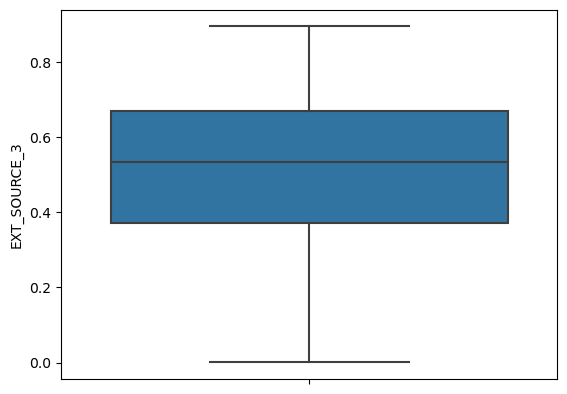

In [460]:
# creating  a boxplot for one of the columns containing null values lets take EXT_SOURCE_3

sns.boxplot(data = df1, y = 'EXT_SOURCE_3' );

In [461]:
df1['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [462]:
# looking at the details the mean is at 0.51 and median is at 0.53
# the 25th and the 75th quartile is at 0.37, and 0.66
# looks like there are no outliers

In [463]:
# now replacing the null values in the column with the mean 

df1['EXT_SOURCE_3'].replace(np.NaN, df1['EXT_SOURCE_3'].mean(), inplace = True)
df1['EXT_SOURCE_3'].isna().sum()

0

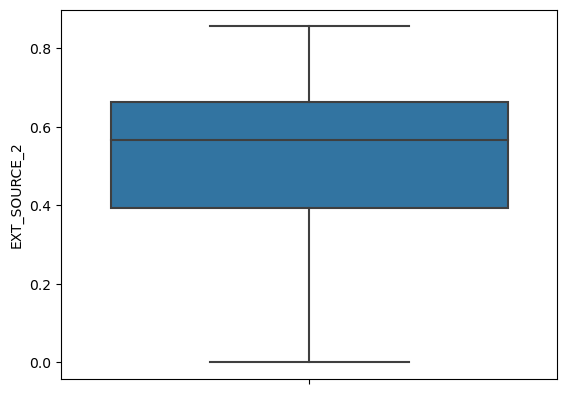

In [464]:
# taking other column EXT_SOURCE_2 and creating a boxplot

sns.boxplot(data = df1, y = 'EXT_SOURCE_2' );

In [465]:
# looking at the details the mean is at 0.51 and median is at 0.56
# the 25th and the 75th quartile is at 0.39, and 0.66
# looks like there are no outliers

df1['EXT_SOURCE_2'].describe().round(6)

count    306851.000000
mean          0.514393
std           0.191060
min           0.000000
25%           0.392457
50%           0.565961
75%           0.663617
max           0.855000
Name: EXT_SOURCE_2, dtype: float64

In [466]:
# replacing the null values in the column by the mean of the column

df1['EXT_SOURCE_2'].replace(np.NaN, df1['EXT_SOURCE_2'].mean(), inplace = True)

In [467]:
# checking the number of missing values in the column

df1['EXT_SOURCE_2'].isna().sum()

0

In [468]:
# the number of columns with null values reduces to 10

len(df1.columns[df1.isna().sum()>0])

10

In [469]:
# having a look at the remaining columns with null values and the % of missing values in df1

100*(df1.isna().sum()/len(df1)).sort_values(ascending = False)[:11]

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
FLAG_DOCUMENT_5                0.000000
dtype: float64

In [470]:
# Looking at the other column AMT_GOODS_PRICE with null values AMT_GOODS_PRICE

df1['AMT_GOODS_PRICE'].describe().round()

count     307233.0
mean      538396.0
std       369446.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

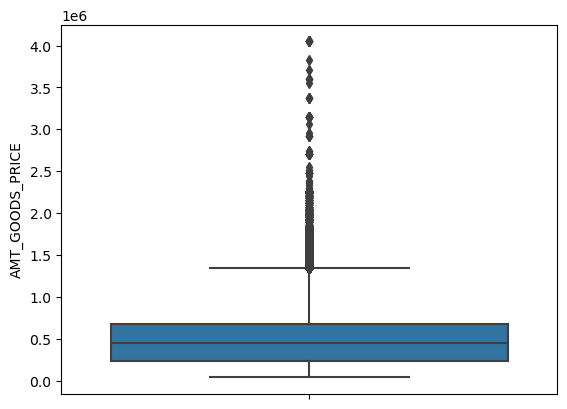

In [471]:
# looking at the details the mean is at 538396.0 and median is at 450000.0
# the 25th and the 75th quartile is at 238500, and 679500.0
# the standard deviation is high 
# looks like there are significant number of outliers which must be dealt with
# replacing them with the mean/median is going to result biasness so we remove rows,  which infact constitutes less than 0.1% of the total rows

sns.boxplot(data = df1, y = df1['AMT_GOODS_PRICE']);

In [472]:
# so getting rid of such records

df1 = df1[~(df1.AMT_GOODS_PRICE.isna())]
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-1982,Sales staff,1.0,1,1,0,0,Services,0.681632,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4090,NaN,1.0,2,2,0,0,XNA,0.115992,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-5150,Managers,1.0,3,3,0,0,School,0.535722,0.218859,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-931,Laborers,2.0,2,2,0,0,Business Entity Type 1,0.514163,0.661024,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [473]:
# Taking another column AMT_REQ_CREDIT_BUREAU_QRT containing null values 

np.max(df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())


215219

In [474]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

41473

In [475]:
df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

# looking at this, 0.0 is used the highest, 256692 times out of 307511 records
# the column is the Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
# so lets replace all the null values with this number 0.0 

0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [476]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace = True)

In [477]:
100*(df1.isna().sum()/len(df1)).sort_values(ascending = False)

OCCUPATION_TYPE                31.355356
AMT_REQ_CREDIT_BUREAU_YEAR     13.498875
AMT_REQ_CREDIT_BUREAU_MON      13.498875
AMT_REQ_CREDIT_BUREAU_WEEK     13.498875
AMT_REQ_CREDIT_BUREAU_DAY      13.498875
AMT_REQ_CREDIT_BUREAU_HOUR     13.498875
AMT_ANNUITY                     0.003906
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_20

In [478]:
# checking for any null values remaining in the column

df1.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

In [479]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())

# the counts of 0.0 also increases to 256692 due to replacing the nulls with 0.0

256692

In [480]:
# Now the number of columns with null values is reduce to 7

len(df1.columns[df1.isna().sum() > 0])

7

In [481]:
# taking another column AMT_REQ_CREDIT_BUREAU_MON

In [482]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())

222022

In [483]:
df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222022
1.0      33128
2.0       5385
3.0       1991
4.0       1076
5.0        602
6.0        342
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [484]:
# this column also has 0.0 as the highest utilized value with over 222000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [485]:
df1.AMT_REQ_CREDIT_BUREAU_MON.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace = True)

In [486]:
# checking for the null values after replacement

df1.AMT_REQ_CREDIT_BUREAU_MON.isna().sum()

0

In [487]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())

# The 0.0 value gets increased to more than 263000 after replacement

263495

In [488]:
# the number of columns left with null values is reduced to 6

len(df1.columns[df1.isna().sum() > 0])

6

In [489]:
# taking another column AMT_REQ_CREDIT_BUREAU_YEAR with null values 

In [490]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())

71733

In [491]:
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71733
1.0     63338
2.0     50143
3.0     33606
4.0     20702
5.0     12048
6.0      6961
7.0      3866
8.0      2126
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [492]:
# this column also has 0.0 as the highest utilized value with over 71700 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [493]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace = True)

In [494]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

0

In [495]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())

# The count of the 0.0 value increased to 113206 after replacement

113206

In [496]:
# The number of columns with nulls reduced to 6

len(df1.columns[df1.isna().sum() > 0])

5

In [497]:
# Taking another column containing null AMT_REQ_CREDIT_BUREAU_WEEK

In [498]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())

257228

In [499]:
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257228
1.0      8204
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [500]:
# this column also has 0.0 as the highest utilized value with over 257000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [501]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace = True)

In [502]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum()

0

In [503]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())

# the count of 0.0 changes from 257228 to 298701 after replacement

298701

In [504]:
# The number of columns containing null values is 4

len(df1.columns[df1.isna().sum() > 0])

4

In [505]:
# Taking another column AMT_REQ_CREDIT_BUREAU_DAY with null value 

In [506]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())


264271

In [507]:
df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264271
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [508]:
# this column also has 0.0 as the highest utilized value with over 264000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness


In [509]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace = True)

In [510]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.isna().sum()

0

In [511]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())

# the number of counts of 0.0 changes to 305744 after replacement

305744

In [512]:
# the number of columns with null values reduces to 3

len(df1.columns[df1.isna().sum() > 0])

3

In [513]:
# taking another column with null values AMT_REQ_CREDIT_BUREAU_HOUR

In [514]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())


264135

In [515]:
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264135
1.0      1559
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [516]:
# this column also has 0.0 as the highest utilized value with over 264000 number of times utilized
# the column is Number of enquiries to Credit Bureau about the client one hour before application
# so replacing the null values with the mode as before since it is a good decision than to replace with mean/median which will only conclude in biasness

In [517]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.replace(np.NaN, df1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace = True)

In [518]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum()

0

In [519]:
np.max(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())

# the count of 0.0 changes to 305608 after replacement

305608

In [520]:
# the number of columns with null values reduces to 2

len(df1.columns[df1.isna().sum() > 0])

2

In [521]:
df1.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
E

In [522]:
# Now taking AMT_ANNUITY column

In [523]:
df1.AMT_ANNUITY.describe()

# the mean is 27120.452357 and median is 24916.5
# 25th and 75th percentile is 16551 and 34596



count    307221.000000
mean      27120.452357
std       14492.106811
min        1615.500000
25%       16551.000000
50%       24916.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [524]:
df1.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    24916.5
0.70    32017.5
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

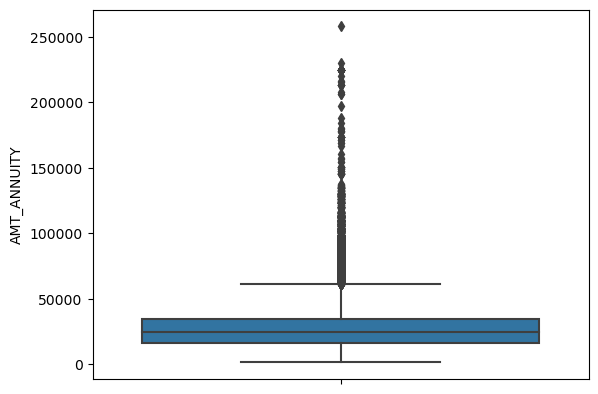

In [525]:
sns.boxplot(data = df1, y = df1.AMT_ANNUITY);

In [526]:
# looking at the summary and the boxplot it looks like there is no outliers in the column

In [527]:
# lets replace the null values with the mean

df1.AMT_ANNUITY.replace(np.NaN, df1.AMT_ANNUITY.mean(), inplace = True)

In [528]:
df1.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
E

In [529]:
# looking at the OCCUPATION_TYPE column

print(df1.OCCUPATION_TYPE.value_counts()[0])

print(df1.OCCUPATION_TYPE.isna().sum())

# here the Laborers value count is 55134
# the count of all the null values in the column is 96334 > 55134
# so it is best not to fill the null values with 55134 because it will increase the count of laborers column


55134
96334


In [530]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-2120,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-291,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-2531,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-2437,Laborers,2.0,2,2,0,0,Business Entity Type 3,0.650442,0.510853,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-3458,Core staff,1.0,2,2,0,0,Religion,0.322738,0.510853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [531]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,-9461,-637,-2120
1,-16765,-1188,-291
2,-19046,-225,-2531
3,-19005,-3039,-2437
4,-19932,-3038,-3458
...,...,...,...
307506,-9327,-236,-1982
307507,-20775,365243,-4090
307508,-14966,-7921,-5150
307509,-11961,-4786,-931


In [532]:
# Now we need to change the sign of the values in the three columns 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'
# since the values cant be negative in these columns

In [533]:
def func(x):
    if x<0:        
        return x*(-1)
    else:
        return x

In [534]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']] = df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']].applymap(func)

In [535]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,9461,637,2120
1,16765,1188,291
2,19046,225,2531
3,19005,3039,2437
4,19932,3038,3458
...,...,...,...
307506,9327,236,1982
307507,20775,365243,4090
307508,14966,7921,5150
307509,11961,4786,931


In [536]:
# converting the DAYS_BIRTH column which consists of client's age in days at the time of application into age

df1['Age'] = df1.DAYS_BIRTH.apply(lambda x: int(np.round(x/365)))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307233 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

# DATA VISUALIZATION

In [537]:
# Dealing with outliers

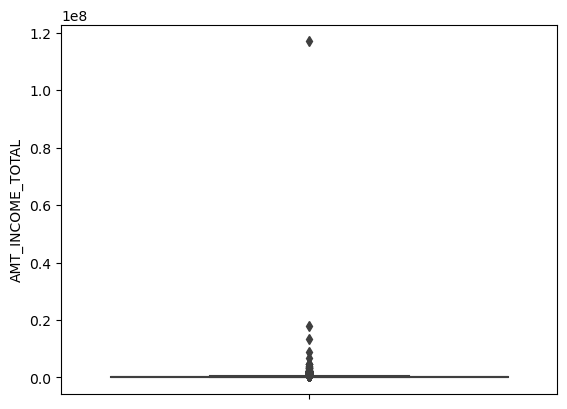

In [538]:
# Boxplot of AMT_INCOME_TOTAL

sns.boxplot(data = df1, y = 'AMT_INCOME_TOTAL');

# Outlier is present far removed from the body

In [539]:
df1.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    148500.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [540]:
df1.AMT_INCOME_TOTAL.describe().round()

count       307233.0
mean        168833.0
std         237216.0
min          25650.0
25%         112500.0
50%         148500.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [541]:
# inter quartile range
int_quart_range = df1.AMT_INCOME_TOTAL.quantile([0.25, 0.75]).values[1] - df1.AMT_INCOME_TOTAL.quantile([0.25, 0.75]).values[0]

In [542]:
# upper bounf
ub = 1.5*int_quart_range + df1.AMT_INCOME_TOTAL.quantile([0.25, 0.75]).values[1]


In [543]:
# replacing the values greater than upper boud ub by the ub

df1['AMT_INCOME_TOTAL'] = df1['AMT_INCOME_TOTAL'].clip(upper=ub)
df1['AMT_INCOME_TOTAL'].head(25)

0     202500.000
1     270000.000
2      67500.000
3     135000.000
4     121500.000
5      99000.000
6     171000.000
7     337500.000
8     112500.000
9     135000.000
10    112500.000
11     38419.155
12     67500.000
13    225000.000
14    189000.000
15    157500.000
16    108000.000
17     81000.000
18    112500.000
19     90000.000
20    135000.000
21    202500.000
22    337500.000
23     83250.000
24    135000.000
Name: AMT_INCOME_TOTAL, dtype: float64

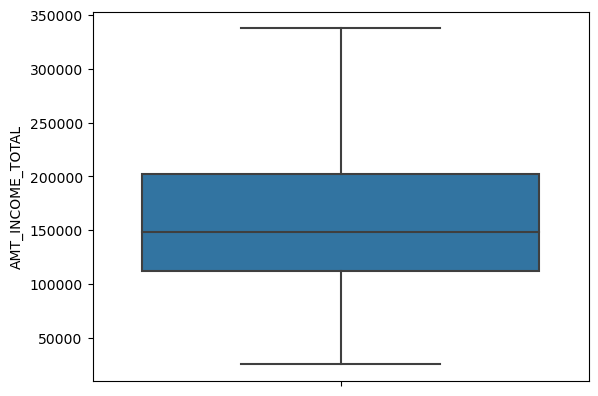

In [544]:
sns.boxplot(data = df1, y = df1.AMT_INCOME_TOTAL);

In [545]:
# AMT_GOODS_PRICE

In [546]:
df1.AMT_GOODS_PRICE.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [547]:
df1.AMT_GOODS_PRICE.describe().round(3)

count     307233.000
mean      538396.207
std       369446.461
min        40500.000
25%       238500.000
50%       450000.000
75%       679500.000
max      4050000.000
Name: AMT_GOODS_PRICE, dtype: float64

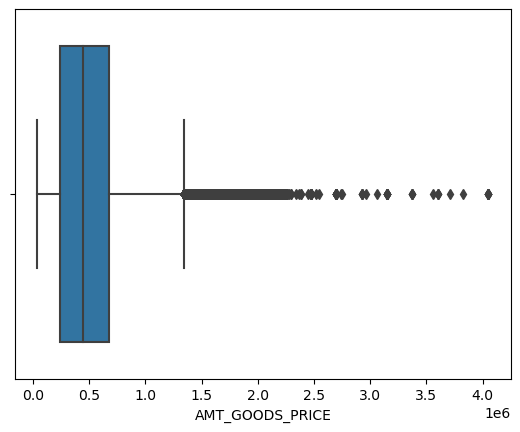

In [548]:
sns.boxplot(data = df1, x = df1.AMT_GOODS_PRICE);

# there are several outliers far removed from the continuous datapoints

In [549]:
# interquartile range
int_quart_range = df1.AMT_GOODS_PRICE.quantile([0.25, 0.75]).values[1] - df1.AMT_GOODS_PRICE.quantile([0.25, 0.75]).values[0]

In [550]:
# calculating the upper bound
ub = 1.5*int_quart_range + df1.AMT_GOODS_PRICE.quantile([0.25, 0.75]).values[1]

In [551]:
# replacing the values where the values are greater than upper bound

df1['AMT_GOODS_PRICE'] = df1['AMT_GOODS_PRICE'].clip(upper=ub)
df1['AMT_GOODS_PRICE']

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307233, dtype: float64

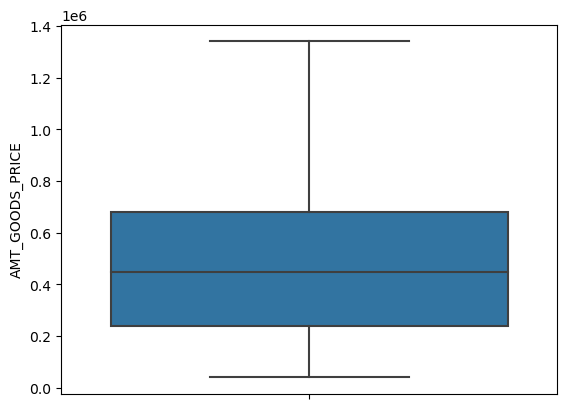

In [552]:
sns.boxplot(data = df1, y = df1.AMT_GOODS_PRICE);

In [553]:
# AMT_ANNUITY

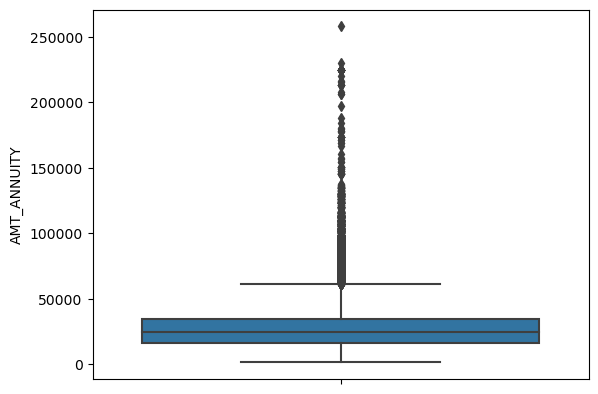

In [554]:
sns.boxplot(data = df1, y = df1.AMT_ANNUITY);

In [555]:
df1.AMT_ANNUITY.describe().round(2)

# No outliers present
# difference in min and max is normal

count    307233.00
mean      27120.45
std       14491.82
min        1615.50
25%       16551.00
50%       24925.50
75%       34596.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64

In [556]:
# AMT_CREDIT

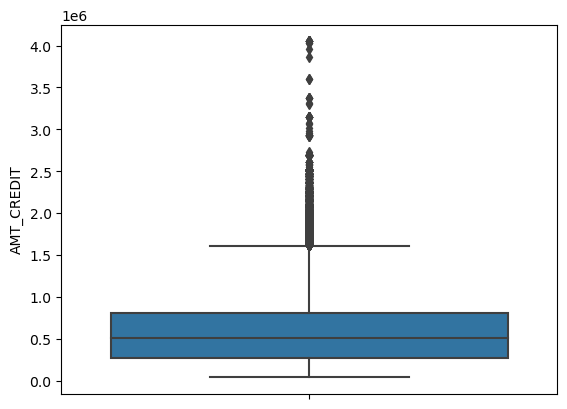

In [557]:
sns.boxplot(data = df1, y = df1.AMT_CREDIT);

In [558]:
df1.AMT_CREDIT.describe().round(2)

count     307233.00
mean      599315.00
std       402517.71
min        45000.00
25%       270000.00
50%       514602.00
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [559]:
df1.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     514602.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1855755.0
Name: AMT_CREDIT, dtype: float64

In [560]:
# No outliers present

In [561]:
# the unique values of CODE_GENDER column are 'M', 'F', 'XNA' , which should only be M/F
# so need to get rid of XNA

df1.CODE_GENDER.unique()


array(['M', 'F', 'XNA'], dtype=object)

In [562]:
df1.CODE_GENDER.value_counts()

# F occurs more than M, about two times more in the column so replacing XNA with F should be best option.

F      202259
M      104970
XNA         4
Name: CODE_GENDER, dtype: int64

In [563]:
df1.CODE_GENDER.mode()


0    F
dtype: object

In [564]:
df1.CODE_GENDER.replace(df1.CODE_GENDER.unique()[2], df1.CODE_GENDER.unique()[1], inplace = True)

In [565]:
df1.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [566]:
df1.CODE_GENDER.value_counts()

F    202263
M    104970
Name: CODE_GENDER, dtype: int64

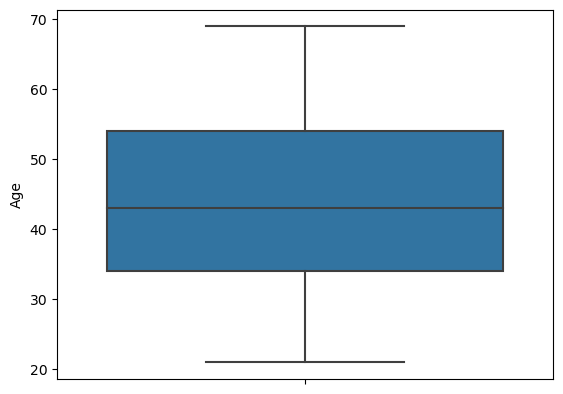

In [567]:
sns.boxplot(data = df1, y = df1.Age);



In [568]:
df1.Age.describe()

# no outliers

count    307233.000000
mean         43.943434
std          11.963627
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: float64

# UNIVARIATE ANALYSIS

In [569]:
# The columns of df1

df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUM

In [570]:
df1.groupby('TARGET').size()
# there are two unique values in this variable
# looks like 0 is utilized the most with more than 280000 times

TARGET
0    282429
1     24804
dtype: int64

In [571]:
df1.groupby('TARGET').size().sum()

307233

In [572]:
# percentage of clients which have difficulty in paying is 8%
# all other 92% clients dont have difficulty in paying
# most clients donot default in loans

df1.groupby('TARGET').size()/df1.groupby('TARGET').size().sum()

TARGET
0    0.919266
1    0.080734
dtype: float64

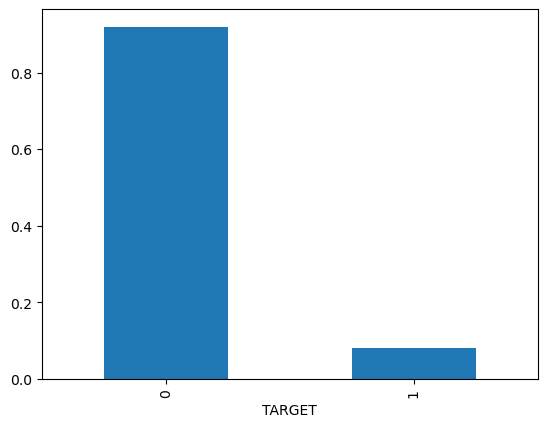

In [573]:
# Now lets plot a bar chart for TARGET varaiable

(df1.groupby('TARGET').size()/df1.groupby('TARGET').size().sum()).plot.bar();

In [574]:
# Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the
# first Y installments of the loan in our sample, 0 - all other cases)
# here there are less people who couldnt repay their loans and more than 90% can repay their loans

In [575]:
# similarly, we plot bar plot for CODE_GENDER
# we see that the most value counts is of F than M

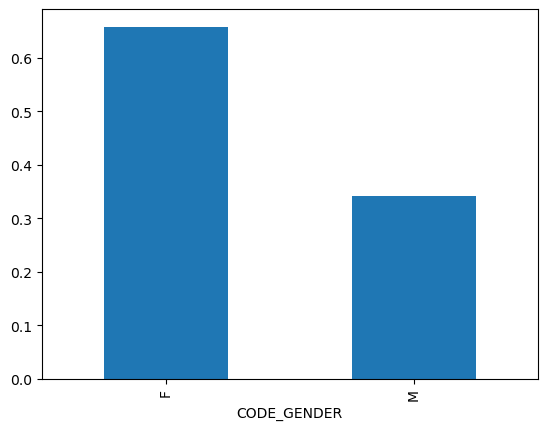

In [576]:
(df1.groupby('CODE_GENDER').size()/df1.groupby('CODE_GENDER').size().sum()).plot.bar();


In [577]:
# most of the people in the dataset are Female which are more than 60%  and more than 30% are males

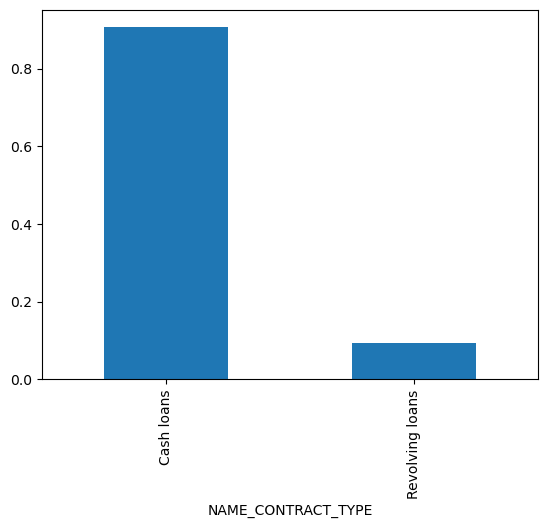

In [578]:
# similarly, we plot bar plot for NAME_CONTRACT_TYPE

(df1.groupby('NAME_CONTRACT_TYPE').size()/df1.groupby('NAME_CONTRACT_TYPE').size().sum()).plot.bar();

In [579]:
# the most number of loans taken is cash loans rather than revolving loans

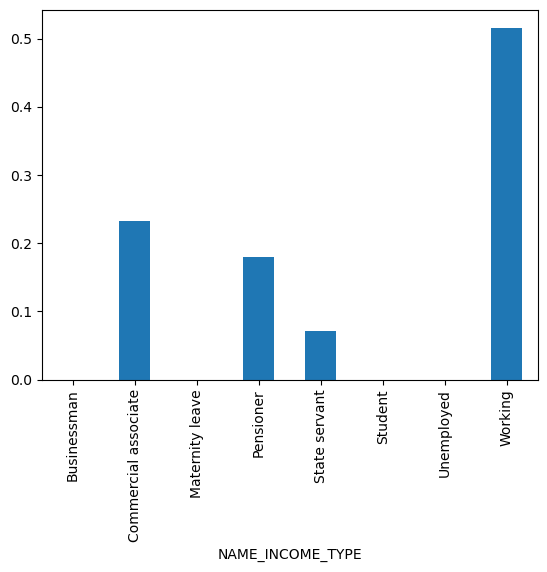

In [580]:
# similarly, we plot bar plot for NAME_INCOME_TYPE

(df1.groupby('NAME_INCOME_TYPE').size()/df1.groupby('NAME_INCOME_TYPE').size().sum()).plot.bar();

In [581]:
# the most number of clients income type is that of working  and then followed by commercial associate and then prisoners and\
# state servant

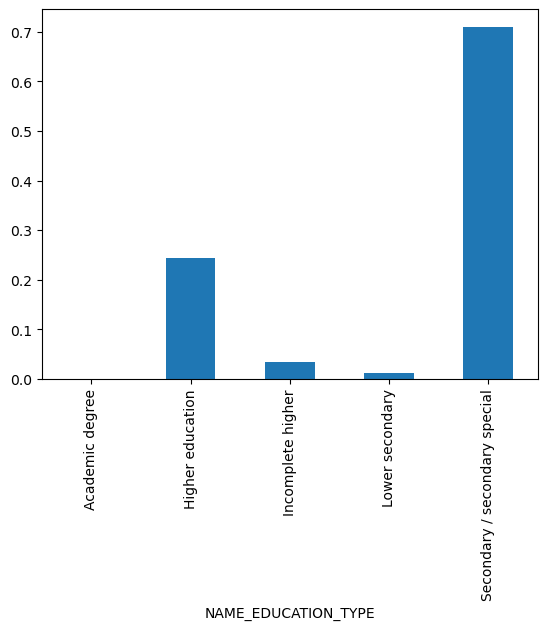

In [582]:
# similarly, we plot bar plot for NAME_EDUCATION_TYPE

(df1.groupby('NAME_EDUCATION_TYPE').size()/df1.groupby('NAME_EDUCATION_TYPE').size().sum()).plot.bar();

In [583]:
# most of the clients education is Secondary level and then higher education and then followed by incomplete higher education

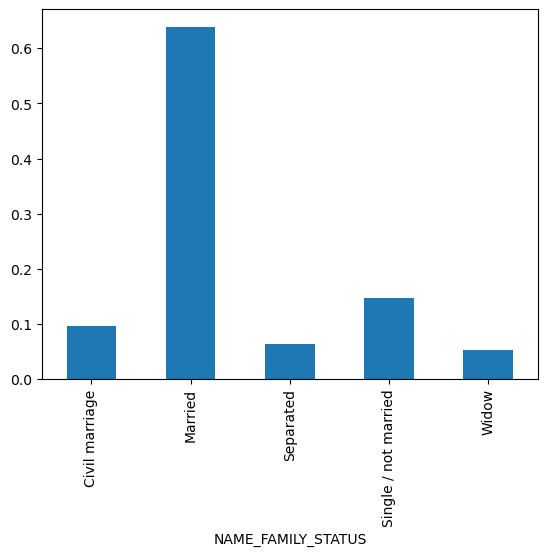

In [584]:
# similarly, we plot bar plot for NAME_FAMILY_STATUS

(df1.groupby('NAME_FAMILY_STATUS').size()/df1.groupby('NAME_FAMILY_STATUS').size().sum()).plot.bar();

In [585]:
# most of the clients are married and then followed by single 

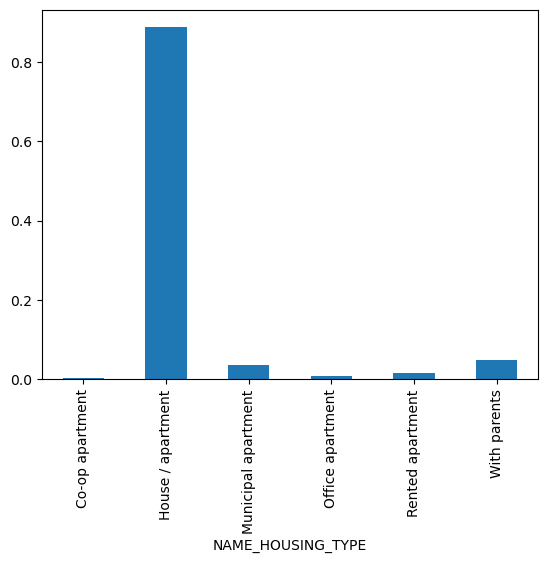

In [586]:
# similarly, we plot bar plot for NAME_HOUSING_TYPE

(df1.groupby('NAME_HOUSING_TYPE').size()/df1.groupby('NAME_HOUSING_TYPE').size().sum()).plot.bar();

In [587]:
# most of the clients have housing and apartments and followed by living with parents

In [588]:
#################################################################

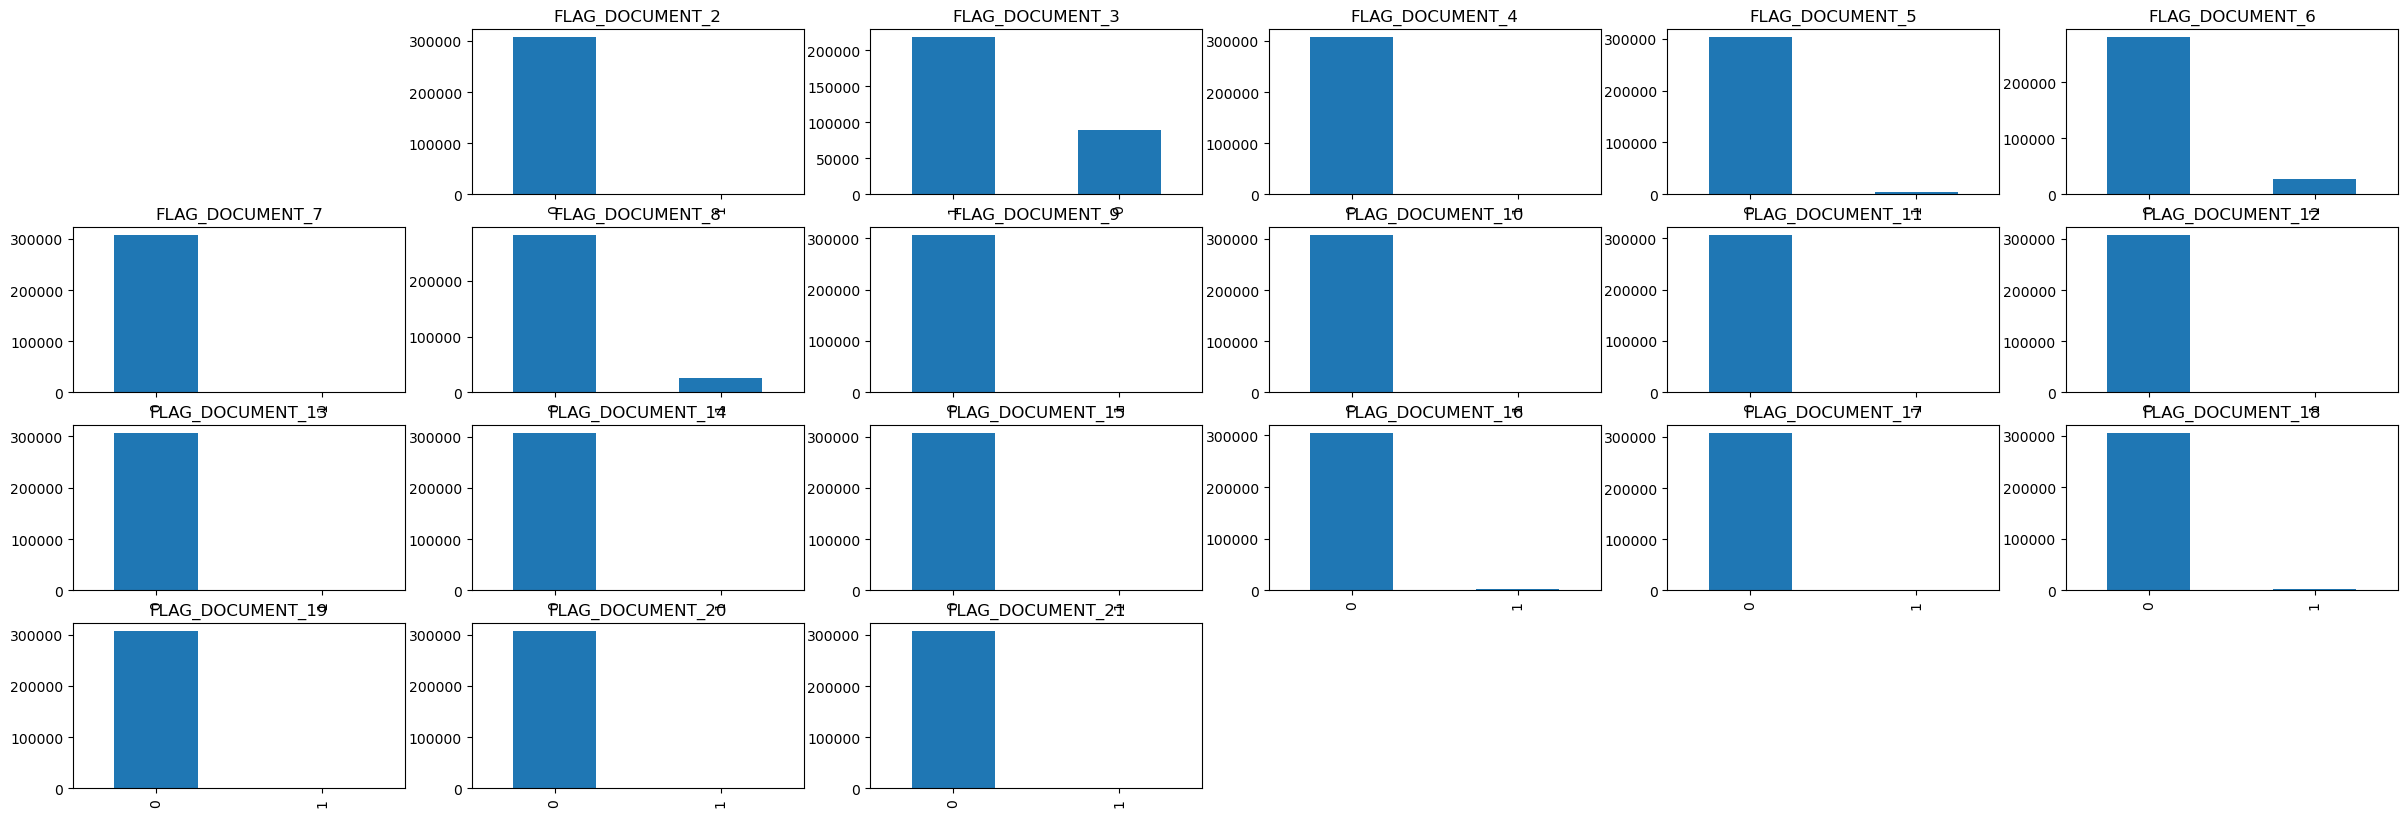

In [589]:
fl = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
plt.figure(figsize=(30,15))
i =1
for x in fl:
    i = i+1
    plt.subplot(6,6,i)
    df1[x].value_counts().plot.bar()
    plt.title(x)

In [590]:
# these are plots for the documents that the clients have provided
# and the bar plot shows most documents are provided by the client
# for 3 documents the some number of clients havent submitted which is for Flag_Document_3, Flag_Document_6 and Flag_Document_8
# 50000 clients havent provided Flag_Document_3
# less than 100000 clients havent provided Flag_Document_6
# less than 100000 clients havent provided Flag_Document_8


In [591]:
# apart from these three columns the rest of the flag document columns we can get rid of

df1 = df1.loc[:, ~(df1.columns.isin(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9',\
                               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',\
                               'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',\
                               'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']))]


In [592]:
# only 3 reuired Flag_Document columns are in the dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307233 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

In [593]:
############################################################################

In [594]:
# number of columns is 38

df1.shape

(307233, 38)

In [595]:
# the number of records in which the clients are able to repay are 282429 which is a lot more than 24804  


len(df1[df1.TARGET == 1]), len(df1[df1.TARGET == 0])

(24804, 282429)

In [596]:
df1[df1.TARGET == 1]['CODE_GENDER'].value_counts(normalize = True)

F    0.570553
M    0.429447
Name: CODE_GENDER, dtype: float64

In [597]:
df1[df1.TARGET == 0]['CODE_GENDER'].value_counts(normalize = True)


F    0.666047
M    0.333953
Name: CODE_GENDER, dtype: float64

In [598]:
df1.groupby('TARGET')['CODE_GENDER'].value_counts()

TARGET  CODE_GENDER
0       F              188111
        M               94318
1       F               14152
        M               10652
Name: CODE_GENDER, dtype: int64

In [599]:
# now plotting for TARGET vs CODE_GENDER

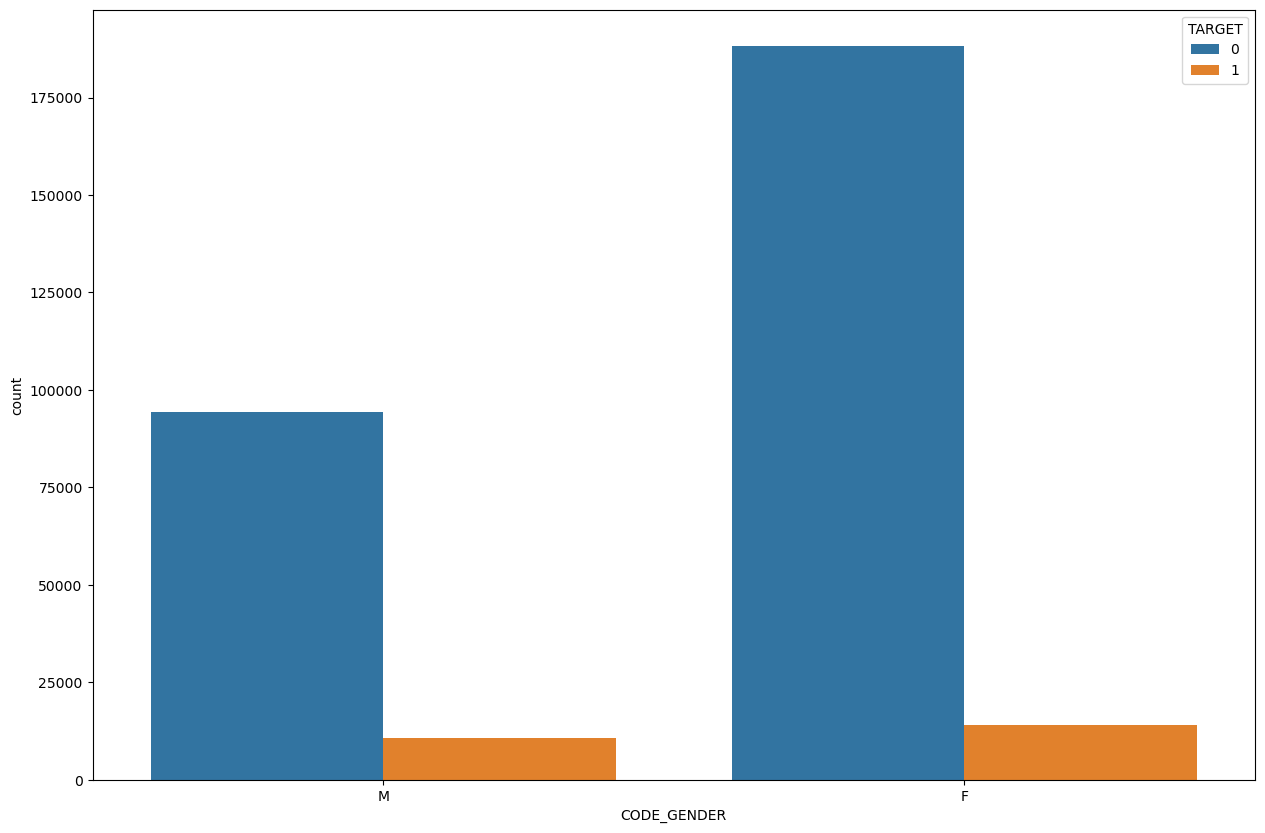

In [600]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.countplot(data=df1, x='CODE_GENDER', hue='TARGET');

In [601]:
# most clients are female
# most male clients are able to repar the loan
# most female clients are able to repay the loan
# less than 12000 male clients and female clients are unable to repay the loan

In [602]:
# Now analysing the relation between TARGET and NAME_CONTRACT_TYPE

In [603]:
df1[df1.TARGET == 1]['NAME_CONTRACT_TYPE'].value_counts(normalize = True)

Cash loans         0.93618
Revolving loans    0.06382
Name: NAME_CONTRACT_TYPE, dtype: float64

In [604]:
df1[df1.TARGET == 0]['NAME_CONTRACT_TYPE'].value_counts(normalize = True)

Cash loans         0.902921
Revolving loans    0.097079
Name: NAME_CONTRACT_TYPE, dtype: float64

In [605]:
df1.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts()

TARGET  NAME_CONTRACT_TYPE
0       Cash loans            255011
        Revolving loans        27418
1       Cash loans             23221
        Revolving loans         1583
Name: NAME_CONTRACT_TYPE, dtype: int64

In [606]:
# more than 250,000  clients are able to repay the cash loan
# more than 23,000  clients are able to repay the revolving loan

# more than 27,000  clients are not able to repay the cash loan
# moe than 1500  clients are not able to repay the revolving loan

# more people have taken cash loan rather than revolving loan and most of them are able to repay the loan

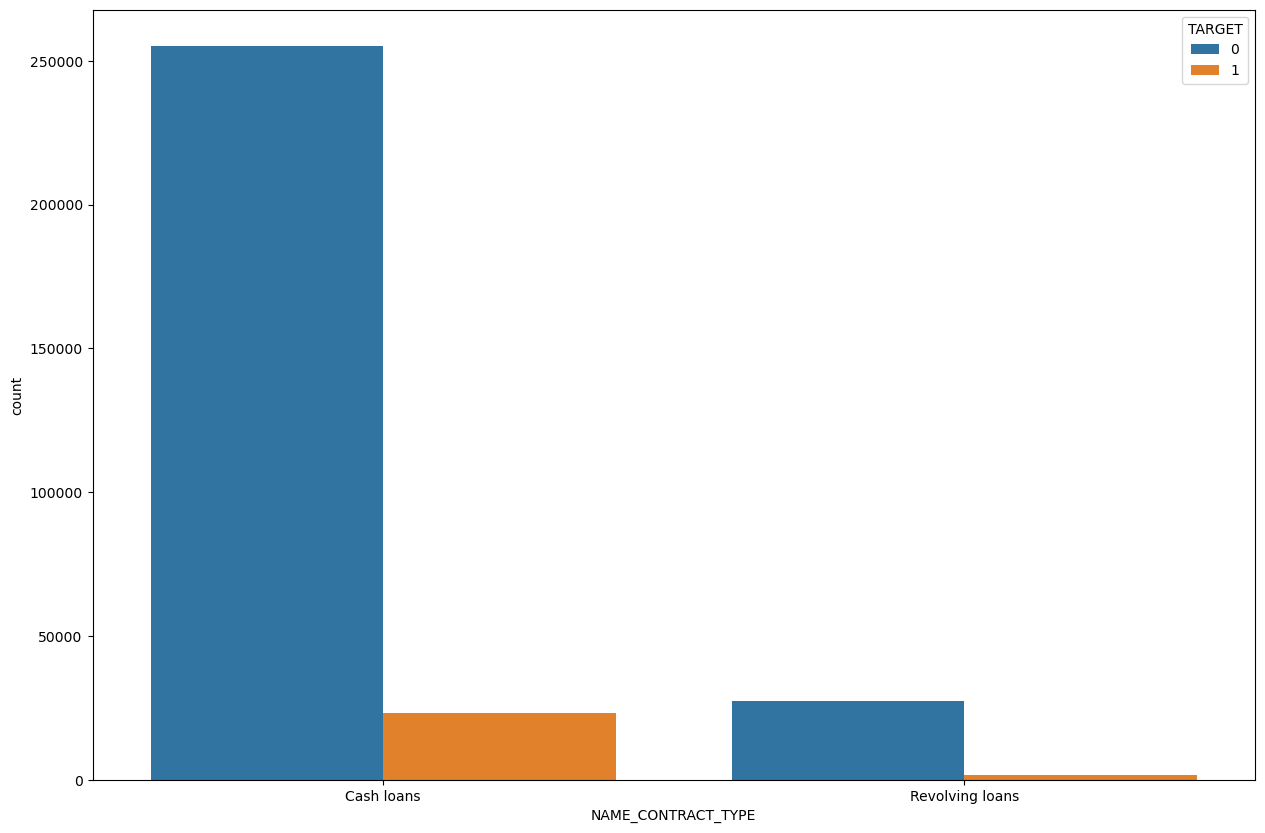

In [607]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.countplot(data=df1, x='NAME_CONTRACT_TYPE', hue='TARGET');

In [608]:
# Lets analyse the relation between TARGET and FLAG_OWN_CAR

In [609]:
df1[df1.TARGET == 1]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.694565
Y    0.305435
Name: FLAG_OWN_CAR, dtype: float64

In [610]:
df1[df1.TARGET == 0]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.656512
Y    0.343488
Name: FLAG_OWN_CAR, dtype: float64

In [611]:
df1.groupby('TARGET')['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185418
        Y                97011
1       N                17228
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64

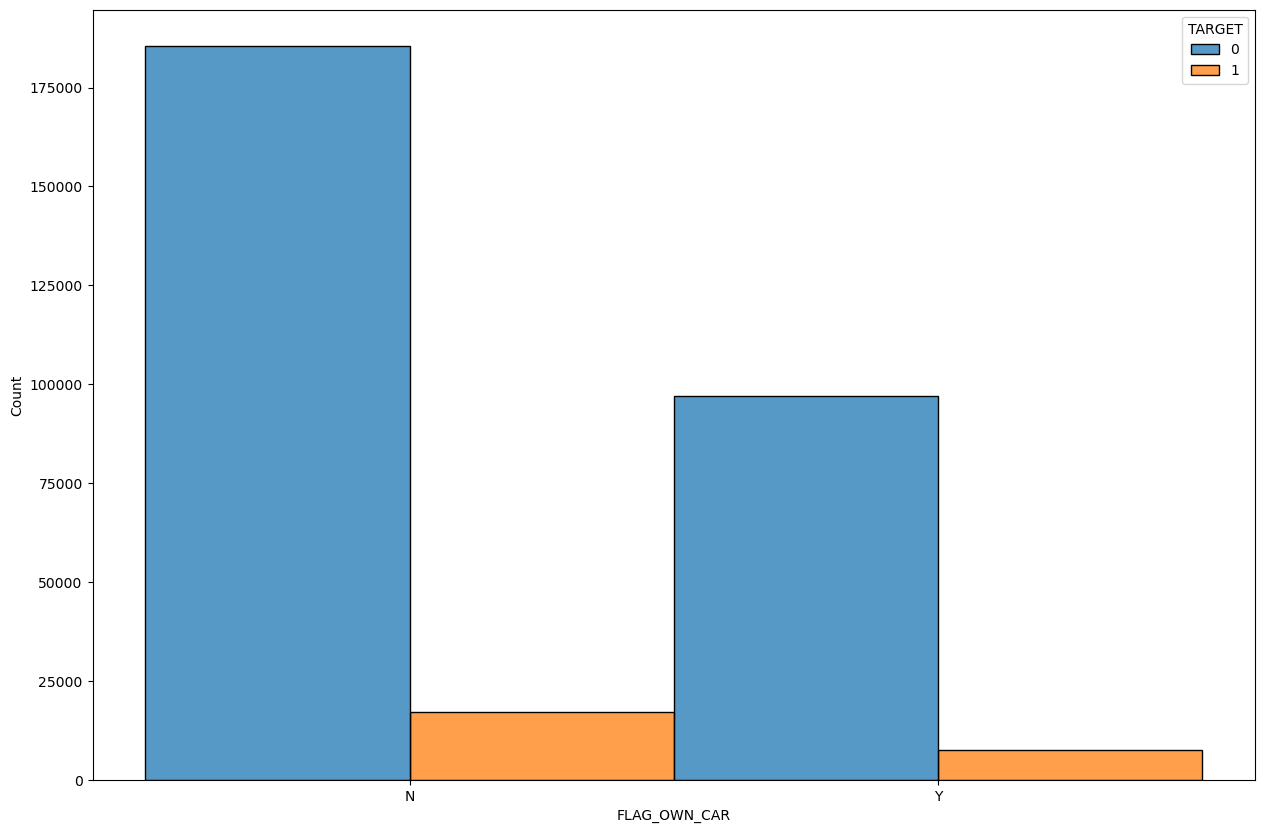

In [612]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='FLAG_OWN_CAR', hue='TARGET', multiple='dodge', discrete=True);


In [613]:
# more than 180,000 clients who can repay loan donot own  a car
# more than 97,000 clients who can repay loan  possess a car

# more than 17,000 clients who cannot repay the loan donot own a car
# more than 7,500 clients who cannot repay the loan own a car

# so most number of clients who can repay the loans donot own a car

In [614]:
# lets aalyse the relation between NAME_INCOME_TYPE and TARGET

In [615]:
df1[df1.TARGET == 1]['NAME_INCOME_TYPE'].value_counts(normalize = True)

Working                 0.613208
Commercial associate    0.215973
Pensioner               0.120142
State servant           0.050274
Unemployed              0.000323
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

In [616]:
df1[df1.TARGET == 0]['NAME_INCOME_TYPE'].value_counts(normalize = True)

Working                 0.507664
Commercial associate    0.234441
Pensioner               0.185388
State servant           0.072347
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

In [617]:
df1.groupby('TARGET')['NAME_INCOME_TYPE'].value_counts()

TARGET  NAME_INCOME_TYPE    
0       Working                 143379
        Commercial associate     66213
        Pensioner                52359
        State servant            20433
        Student                     18
        Unemployed                  14
        Businessman                 10
        Maternity leave              3
1       Working                  15210
        Commercial associate      5357
        Pensioner                 2980
        State servant             1247
        Unemployed                   8
        Maternity leave              2
Name: NAME_INCOME_TYPE, dtype: int64

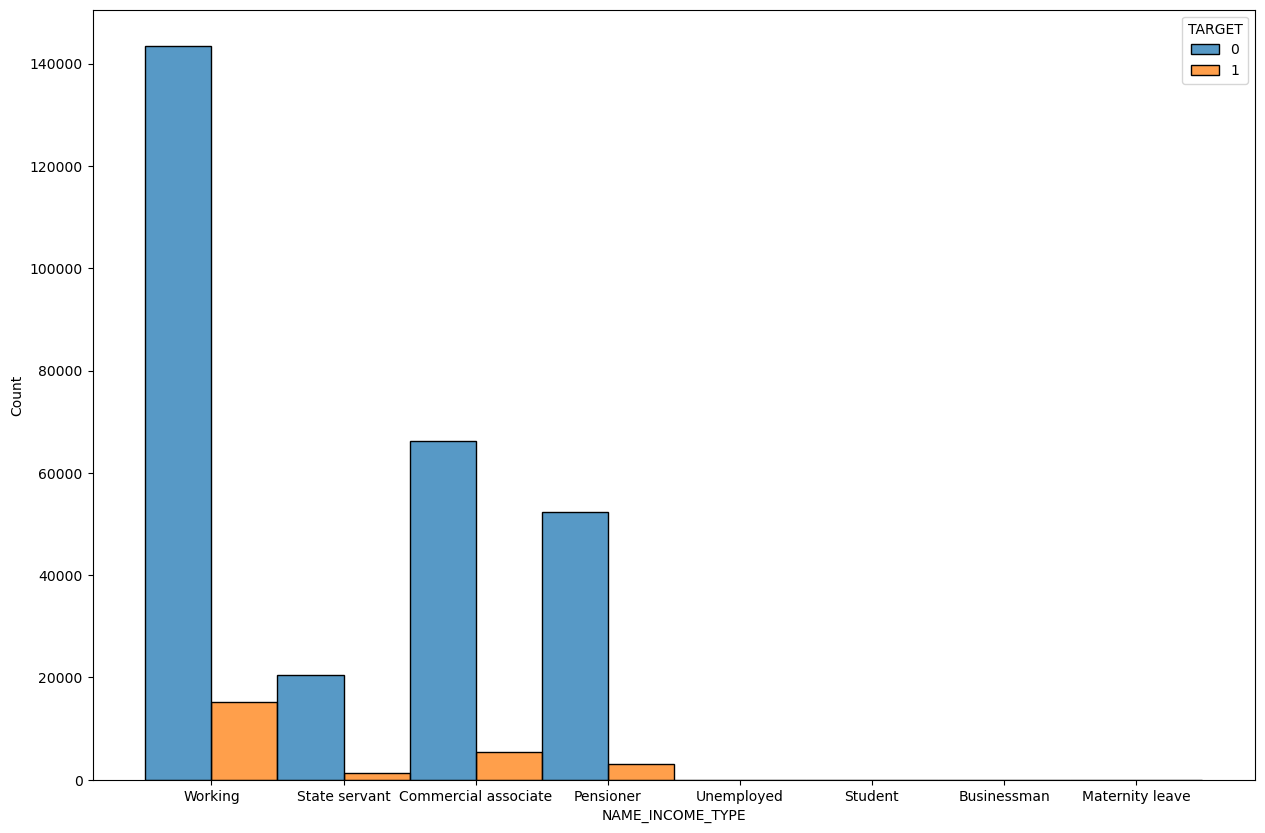

In [618]:
plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='NAME_INCOME_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [619]:
# clients who have a working income type are more likely to repay the loan because 198,684 are able to repay 
# and 15,210 are unable to pay

# clients who have a Commercial associate income type are more likely to repay the loan as 66,213 can repay the loan and 5,357 are unable to
# repay the loan

# clients who have Pensioner income type are also likely to repay as 52,359 are able to repay and 2,980 are not able to.

# clients having state servant income type are likely to repay as 20,433 are likely to pay and 1,247 are not able to.

# clients having student type are all likely to repay the loan

# clients having unemployment income type are also most like to pay since 14 out of 22 are able to pay.

# clients having businessman as income type are all likely to repay the loan like student income type.

# clients having maternity leave as income type half of them are able to repay the loan.

In [620]:
# Lets look at the relation between TARGET and EDUCATION_TYPE

In [621]:
df1[df1.TARGET == 1]['NAME_EDUCATION_TYPE'].value_counts(normalize = True)

Secondary / secondary special    0.786446
Higher education                 0.161506
Incomplete higher                0.035115
Lower secondary                  0.016812
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [622]:
df1[df1.TARGET == 0]['NAME_EDUCATION_TYPE'].value_counts(normalize = True)

Secondary / secondary special    0.703483
Higher education                 0.250654
Incomplete higher                0.033269
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [623]:
df1.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts()

TARGET  NAME_EDUCATION_TYPE          
0       Secondary / secondary special    198684
        Higher education                  70792
        Incomplete higher                  9396
        Lower secondary                    3396
        Academic degree                     161
1       Secondary / secondary special     19507
        Higher education                   4006
        Incomplete higher                   871
        Lower secondary                     417
        Academic degree                       3
Name: NAME_EDUCATION_TYPE, dtype: int64

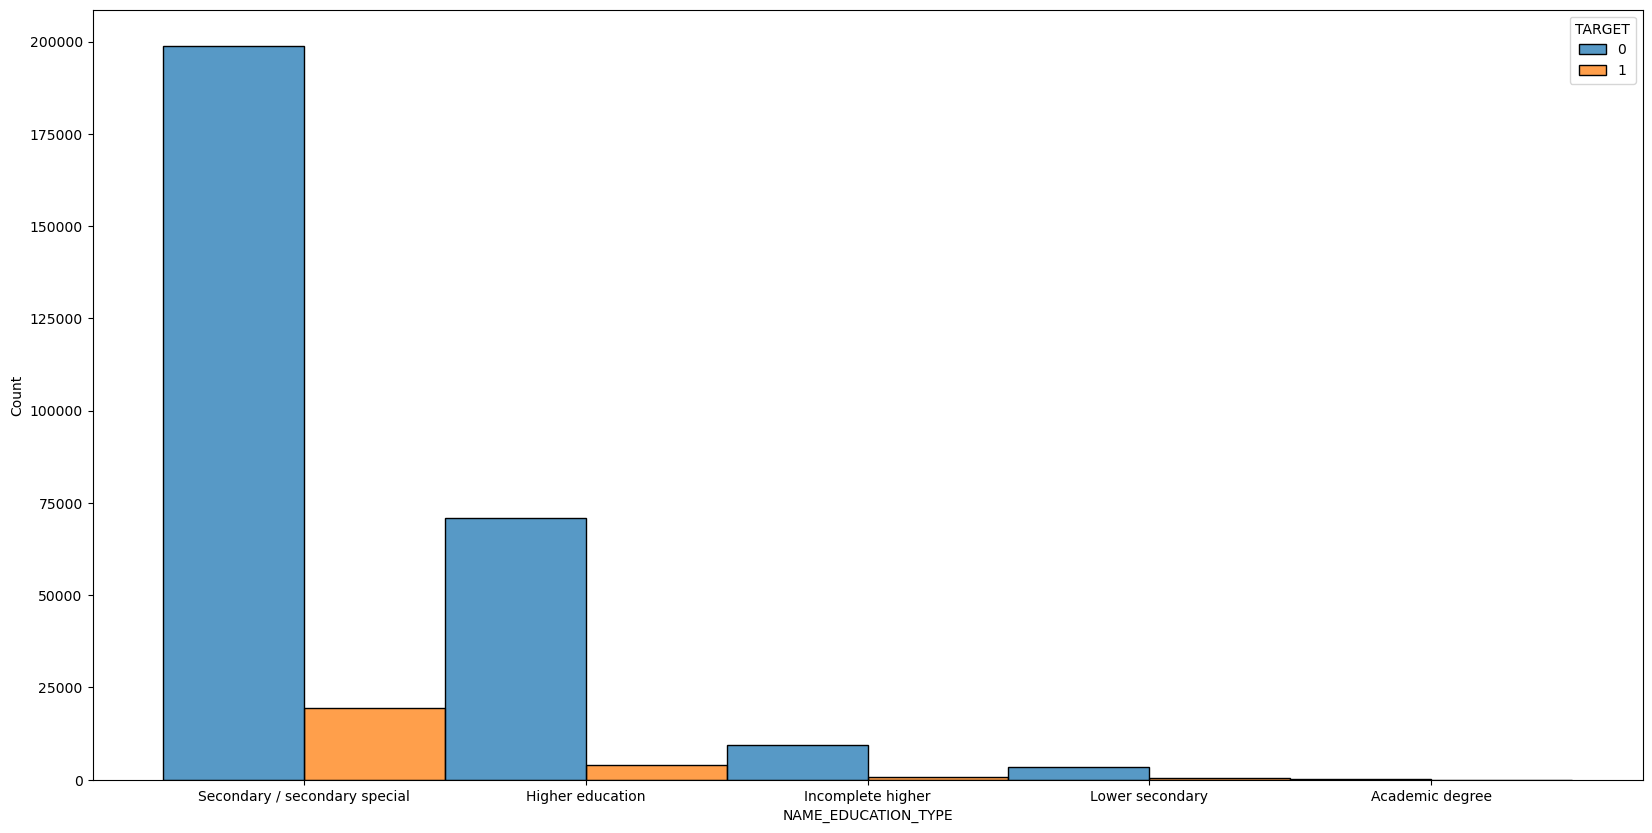

In [624]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='NAME_EDUCATION_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [625]:
# clients who have a secondary/secondary education are more likely to repay the loan because 198,684 are able to repay 
# and 19,507 are unable to pay

# clients who have a higher education are more likely to repay the loan as 70,792 can repay the loan and 4,006 are unable to
# repay the loan

# clients who have incomplete higher education are also likely to repay as 9,393 are able to repay and 871 are not able to.

# clients having lower secondary most of them are likely to repay

# clients having academic degree are also more likely to repay





In [626]:
# Now lets analyse relation between TARGET and FLAG_OWN_CAR

In [627]:
df1[df1.TARGET == 1]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.694565
Y    0.305435
Name: FLAG_OWN_CAR, dtype: float64

In [628]:
df1[df1.TARGET == 0]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.656512
Y    0.343488
Name: FLAG_OWN_CAR, dtype: float64

In [629]:
df1.groupby('TARGET')['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185418
        Y                97011
1       N                17228
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64

In [630]:
df1[df1.TARGET == 1]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.694565
Y    0.305435
Name: FLAG_OWN_CAR, dtype: float64

In [631]:
df1[df1.TARGET == 0]['FLAG_OWN_CAR'].value_counts(normalize = True)

N    0.656512
Y    0.343488
Name: FLAG_OWN_CAR, dtype: float64

In [632]:
df1.groupby('TARGET')['FLAG_OWN_CAR'].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185418
        Y                97011
1       N                17228
        Y                 7576
Name: FLAG_OWN_CAR, dtype: int64

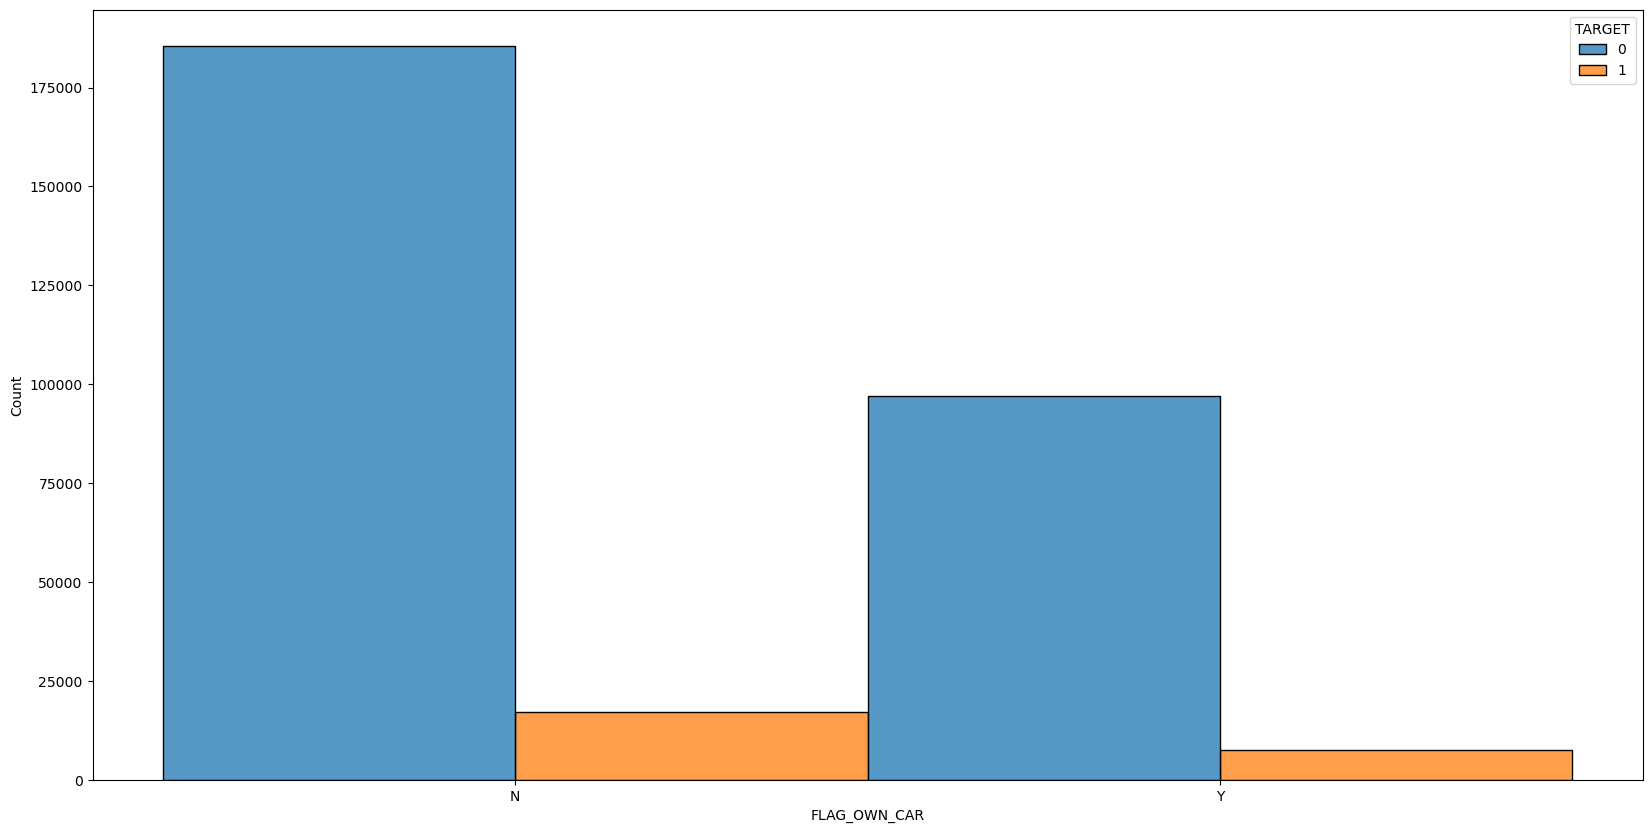

In [633]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='FLAG_OWN_CAR', hue='TARGET', multiple='dodge', discrete=True);


In [634]:
# clients who down own a car are more than clients with a car
# clients who are donot have a car are more likely to repay the loan than whose without as more than 185000 can repay and more than 17000 are unable to.
# clients with car are more likely to pay the loan as more than 95000 can repay & more than 7500 are unable to.
# Out of over 100,000 more than 95,000 clients with a car are able to repay the loan.
# from more than 200,000 clients without a car, more than 185,000 are able to repay the lean while the rest are not able to repay.
# So comparing clients with a car, their performance is better as  compared to clients without a car.

In [635]:
# lets analyse the relation between TARGET and NAME_HOUSING_TYPE

In [636]:
df1[df1.TARGET == 1]['NAME_HOUSING_TYPE'].value_counts(normalize = True)

House / apartment      0.856918
With parents           0.069948
Municipal apartment    0.038462
Rented apartment       0.024190
Office apartment       0.006894
Co-op apartment        0.003588
Name: NAME_HOUSING_TYPE, dtype: float64

In [637]:
df1[df1.TARGET == 0]['NAME_HOUSING_TYPE'].value_counts(normalize = True)

House / apartment      0.890061
With parents           0.046337
Municipal apartment    0.036158
Rented apartment       0.015140
Office apartment       0.008654
Co-op apartment        0.003650
Name: NAME_HOUSING_TYPE, dtype: float64

In [638]:
df1.groupby('TARGET')['NAME_HOUSING_TYPE'].value_counts()

TARGET  NAME_HOUSING_TYPE  
0       House / apartment      251379
        With parents            13087
        Municipal apartment     10212
        Rented apartment         4276
        Office apartment         2444
        Co-op apartment          1031
1       House / apartment       21255
        With parents             1735
        Municipal apartment       954
        Rented apartment          600
        Office apartment          171
        Co-op apartment            89
Name: NAME_HOUSING_TYPE, dtype: int64

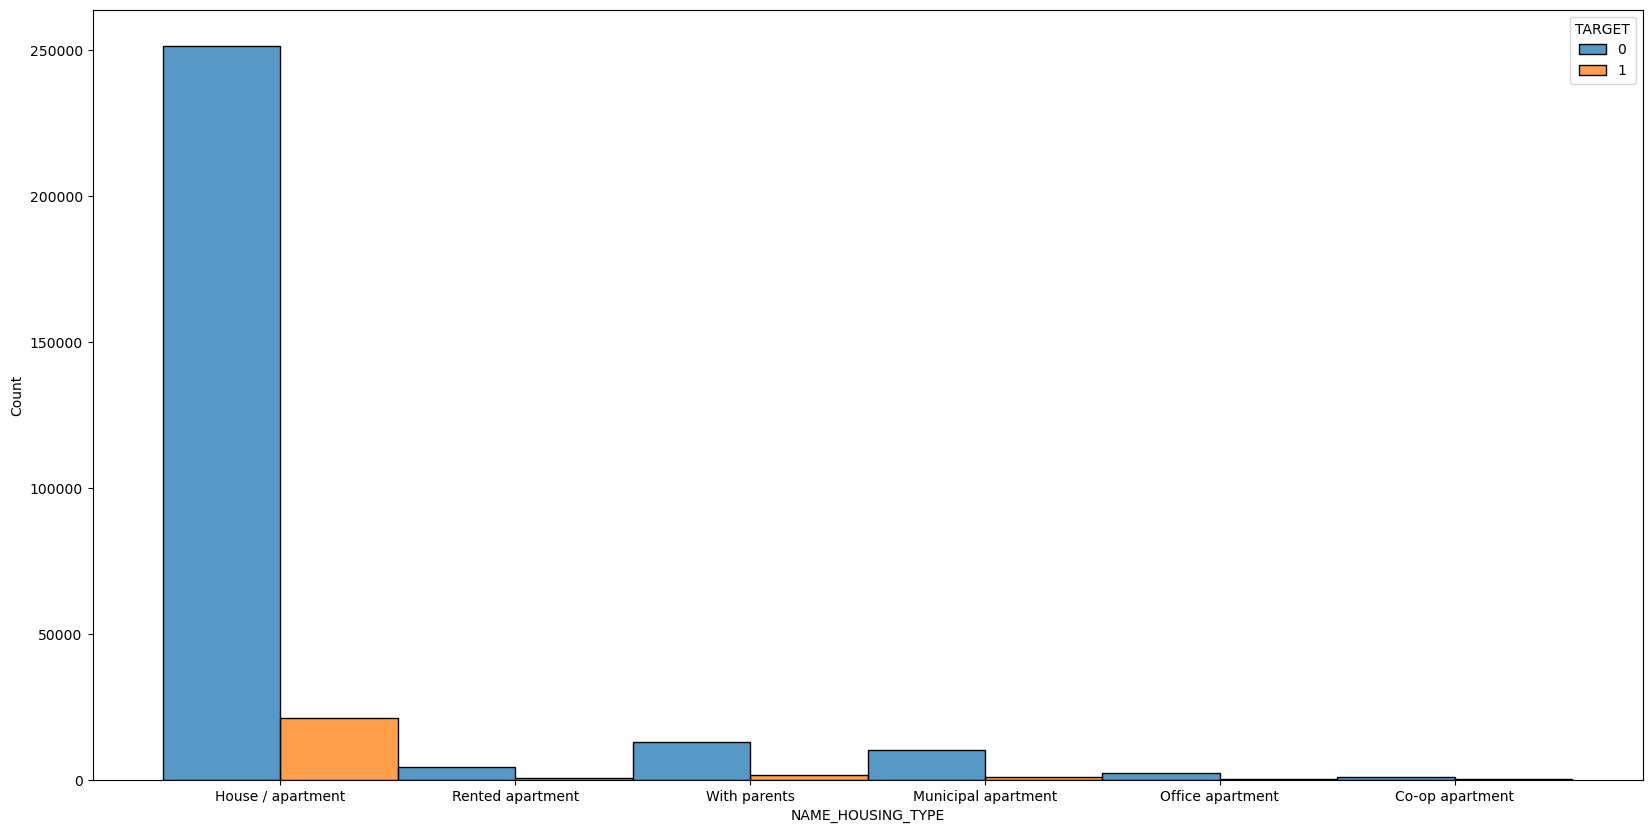

In [639]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='NAME_HOUSING_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [640]:

# clients having house or apartment are more likely to repay the loan as out of more than 270,000 more than 250,000 are able to.

# clients who are living with parents  are also likely to repay as out of more than 14,000 more than 13,000 are able to.

# clients having municipital apartment, out of more than 11,000 more than 10,000 are able to repay.

# clients having rented apartment, out of more than 4000 more than 4000 are able to repay.

# clients having office apartment, out of more than 2500 more than 2400 are able to repay.

# clients having coop apartment, out of more than 1100 more than 1,000 are able to repay.


In [641]:
# Now lets analyse the relation between ORGANIZATION_TYPE and TARGET

In [642]:
df1[df1.TARGET == 1]['ORGANIZATION_TYPE'].value_counts(normalize = True).head()

Business Entity Type 3    0.254717
Self-employed             0.157313
XNA                       0.120464
Other                     0.051403
Business Entity Type 2    0.036244
Name: ORGANIZATION_TYPE, dtype: float64

In [643]:
df1[df1.TARGET == 0]['ORGANIZATION_TYPE'].value_counts(normalize = True).head()

Business Entity Type 3    0.218161
XNA                       0.185406
Self-employed             0.122006
Other                     0.054506
Medicine                  0.036986
Name: ORGANIZATION_TYPE, dtype: float64

In [644]:
df1.groupby('TARGET')['ORGANIZATION_TYPE'].value_counts()

TARGET  ORGANIZATION_TYPE     
0       Business Entity Type 3    61615
        XNA                       52364
        Self-employed             34458
        Other                     15394
        Medicine                  10446
        Government                 9665
        Business Entity Type 2     9643
        School                     8357
        Trade: type 7              7086
        Kindergarten               6389
        Construction               5929
        Business Entity Type 1     5495
        Transport: type 4          4891
        Industry: type 9           3142
        Trade: type 3              3128
        Industry: type 3           2928
        Security                   2918
        Housing                    2719
        Military                   2495
        Industry: type 11          2469
        Bank                       2375
        Police                     2220
        Agriculture                2195
        Transport: type 2          2031
        P

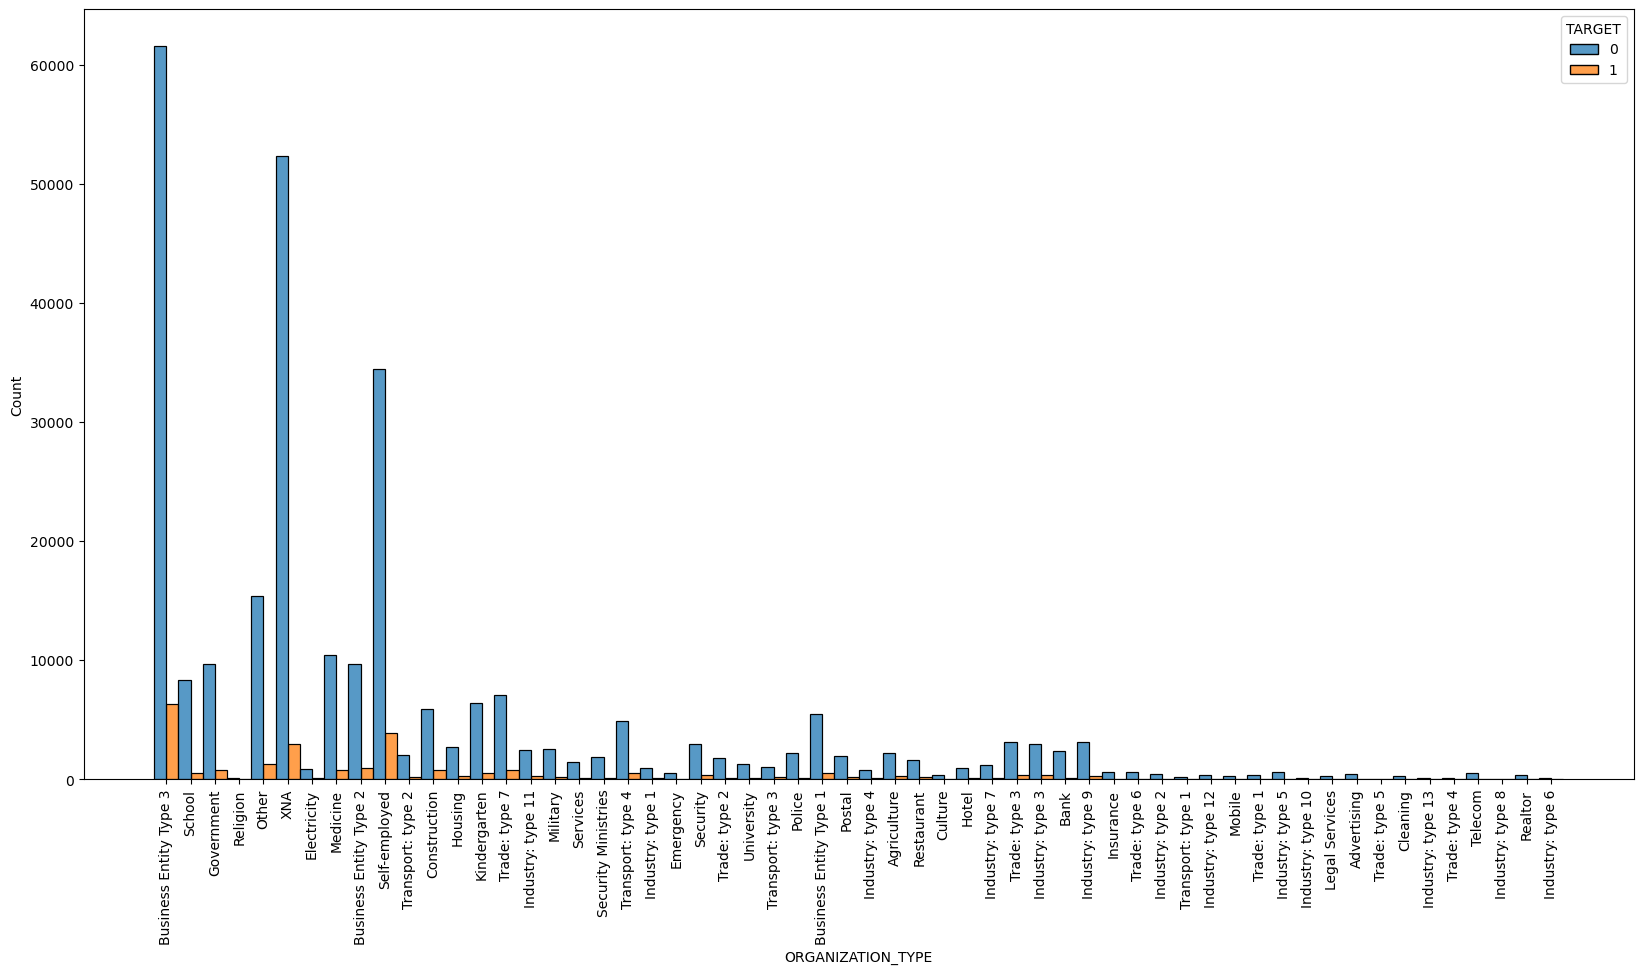

In [645]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.histplot(data=df1, x='ORGANIZATION_TYPE', hue='TARGET', multiple='dodge', discrete=True);
plt.xticks(rotation = 90);

In [646]:
len(df1['ORGANIZATION_TYPE'].unique())

58

In [647]:
# The plot give us the following information:

# clients having Business Entity Type 3 as occupation are the most to apply and they are the most likely to repay since more than 60000 are able to pay the loan as compared to less than 8000 who cannot

# School are the most likely to repay since near to 10,000 are able to pay the loan as compared to less than 2000 who cannot

# Governmentare the most likely to repay since more than 60000 are able to pay the loan as compared to less than 3000 who cannot

# Religion are the most likely to repay since they donot take much loan as everyone else.

# Other are the most likely to repay since more than 16000 are able to pay the loan as compared to less than 4000 who cannot

# Electricity are the most likely to repay since more than 60000 are able to pay the loan as compared to less than 10000 who cannot

# Medicine are the most likely to repay since near to 10000 are able to pay the loan as compared to less than 3000 who cannot

# Business Entity Type 2 are the most likely to repay since near to 10000 are able to pay the loan as compared to less than 3000 who cannot

# Self-employed are the most likely to repay about 35000 are able to pay the loan as compared to less than 5000 who cannot


In [648]:
# lets analyse the occupation type and target

In [649]:
df1[df1.TARGET == 1]['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.314733
Sales staff              0.166703
Drivers                  0.113708
Core staff               0.093632
Managers                 0.071560
Security staff           0.038910
High skill tech staff    0.037831
Cooking staff            0.033513
Medicine staff           0.030815
Accountants              0.025580
Cleaning staff           0.024123
Low-skill Laborers       0.019374
Private service staff    0.009390
Waiters/barmen staff     0.008203
Secretaries              0.004965
Realty agents            0.003184
HR staff                 0.001943
IT staff                 0.001835
Name: OCCUPATION_TYPE, dtype: float64

In [650]:
df1[df1.TARGET == 0]['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.256289
Sales staff              0.150622
Core staff               0.134096
Managers                 0.104081
Drivers                  0.085684
High skill tech staff    0.055466
Accountants              0.048490
Medicine staff           0.041363
Security staff           0.031148
Cooking staff            0.027650
Cleaning staff           0.021838
Private service staff    0.012861
Low-skill Laborers       0.009009
Secretaries              0.006306
Waiters/barmen staff     0.006207
Realty agents            0.003597
HR staff                 0.002740
IT staff                 0.002552
Name: OCCUPATION_TYPE, dtype: float64

In [651]:
df1.groupby('TARGET')['OCCUPATION_TYPE'].value_counts()

TARGET  OCCUPATION_TYPE      
0       Laborers                 49302
        Sales staff              28975
        Core staff               25796
        Managers                 20022
        Drivers                  16483
        High skill tech staff    10670
        Accountants               9328
        Medicine staff            7957
        Security staff            5992
        Cooking staff             5319
        Cleaning staff            4201
        Private service staff     2474
        Low-skill Laborers        1733
        Secretaries               1213
        Waiters/barmen staff      1194
        Realty agents              692
        HR staff                   527
        IT staff                   491
1       Laborers                  5832
        Sales staff               3089
        Drivers                   2107
        Core staff                1735
        Managers                  1326
        Security staff             721
        High skill tech staff     

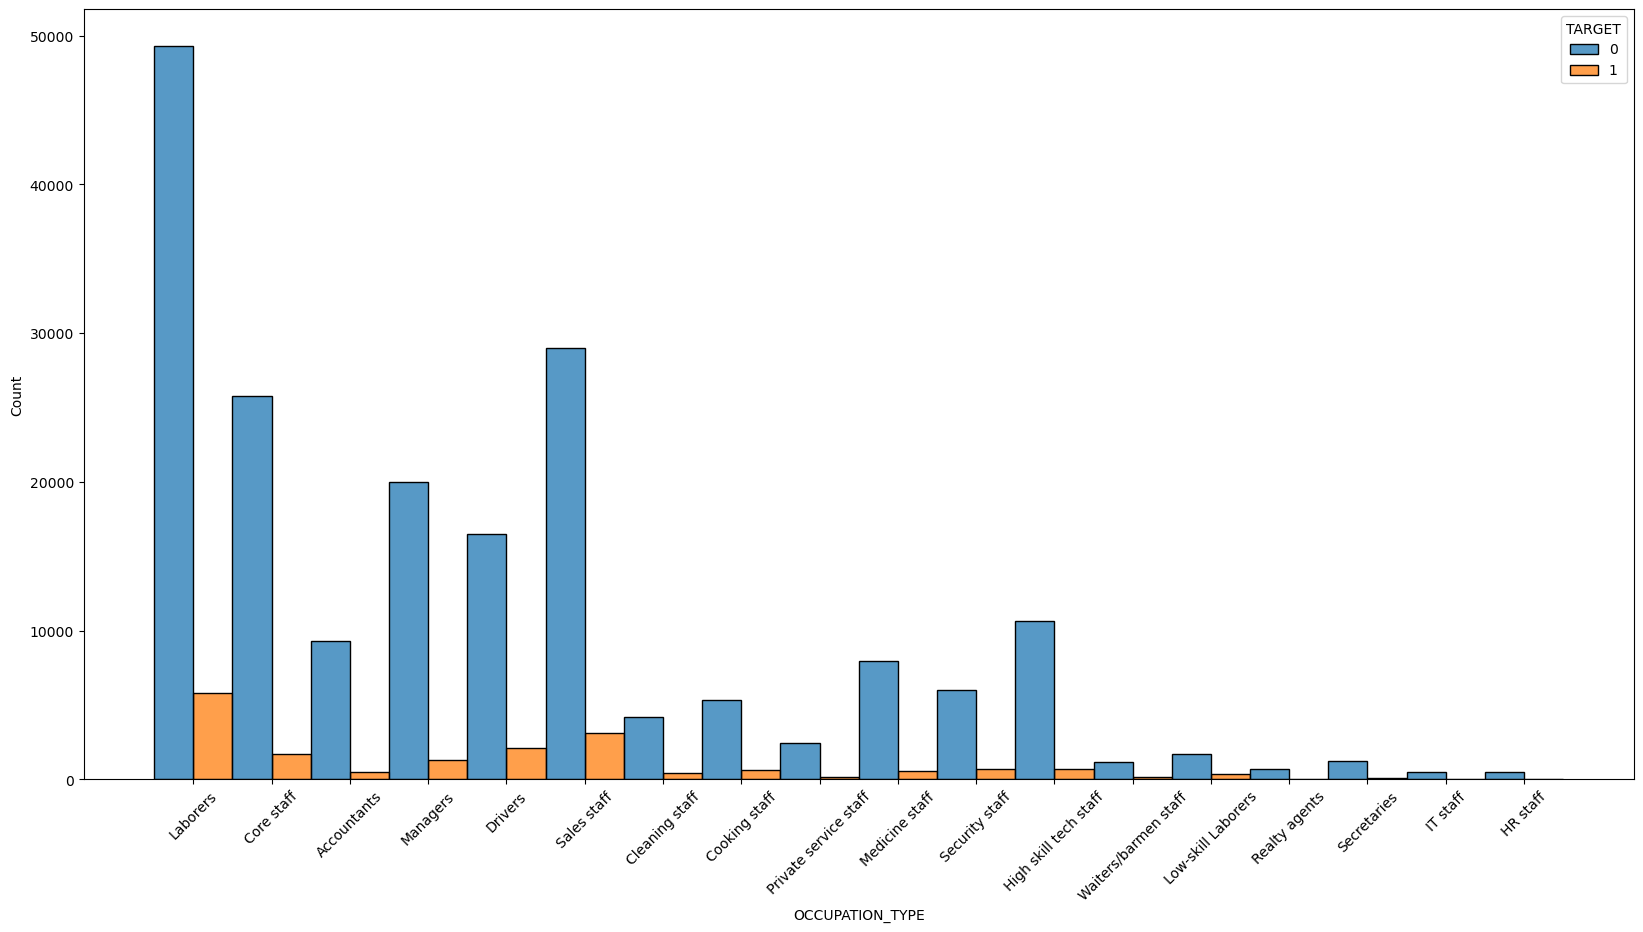

In [652]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
plt.xticks(rotation = 45)
sns.histplot(data=df1, x='OCCUPATION_TYPE', hue='TARGET', multiple='dodge', discrete=True);


In [653]:
# the most number of applicants are from the laborers occupation.

# clients who are laborers, near to 50000 are able to repay while about 5000 are not able to

# clients who are core staff, more than 25000 are able to repay while about 2000 are not able to

# clients who are accountants, close to 10000 are able to repay while about 1000 are not able to

# clients who are managers, close to 20000 are able to repay while about 2000 are not able to

# clients who are drivers, more than 16000 are able to repay while about 3000 are not able to

# clients who are sales staff, close to 30000 are able to repay while about 4000 are not able to


# BIVARIATE ANALYSIS

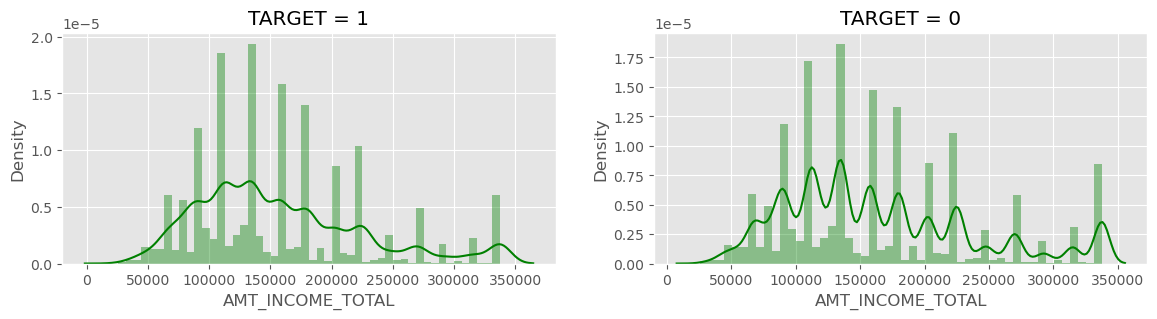

In [654]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.distplot(df1[df1.TARGET == 1]['AMT_INCOME_TOTAL'], color = 'Green');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.distplot(df1[df1.TARGET == 0]['AMT_INCOME_TOTAL'], color = 'Green')
plt.title('TARGET = 0');


In [655]:
# the distribution of credit amount of loan for clients who are not able to to repay the loans is very high betweeen 100,000-150,000
# the distribution of credit amount of loan for clients who are able to to repay the loans is very high betweeen 100,000-150,000


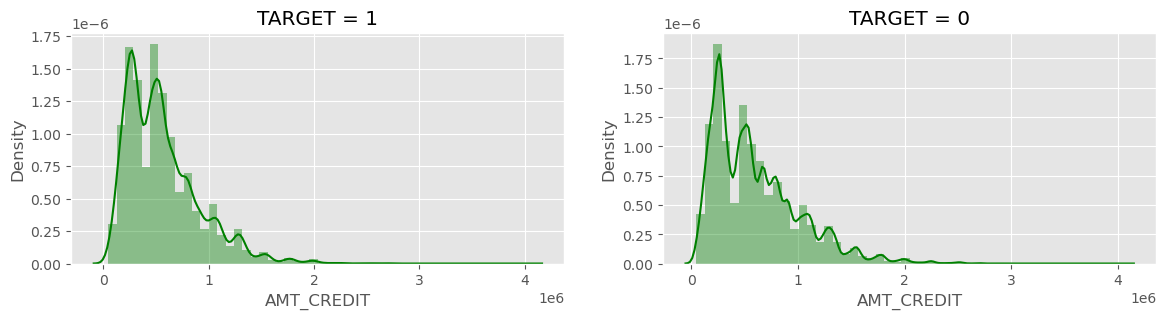

In [656]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.distplot(df1[df1.TARGET == 1]['AMT_CREDIT'], color = 'Green');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.distplot(df1[df1.TARGET == 0]['AMT_CREDIT'], color = 'Green')
plt.title('TARGET = 0');


In [657]:
# the distribution of credit amount of loan for clients who are not able to to repay the loans is very high betweeen 0.2-0.7
# the distribution of credit amount of loan for clients who are not able to to repay the loans is very high betweeen 0.2-0.4

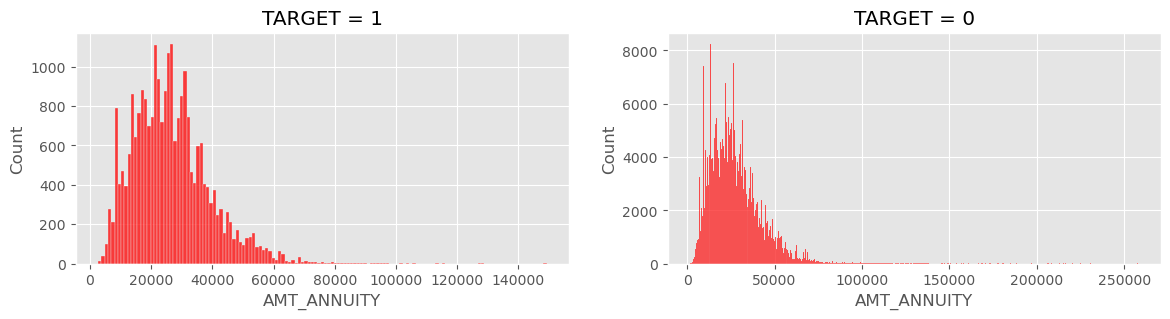

In [658]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.histplot(df1[df1.TARGET == 1]['AMT_ANNUITY'], color = 'Red');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.histplot(df1[df1.TARGET == 0]['AMT_ANNUITY'], color = 'Red');
plt.title('TARGET = 0');


In [659]:
# the clients who are not able to repay the loans have highest loan annuity between 20,000 and 30,000
# the clients who are able to repay the loans have highest loan annuity between 20,000 and 30,000



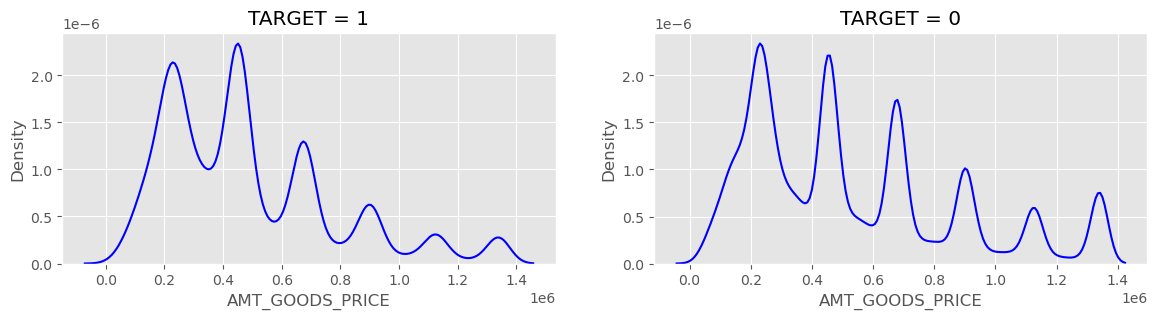

In [660]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.kdeplot(df1[df1.TARGET == 1]['AMT_GOODS_PRICE'], color = 'Blue');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.kdeplot(df1[df1.TARGET == 0]['AMT_GOODS_PRICE'], color = 'Blue');
plt.title('TARGET = 0');


In [661]:
# the clients who are not able to repay the loans have highest distribution of price of goods for the loan is highest in points 0.2 and 0.4
# the clients who are able to repay the loans have highest distribution of price of goods for the loan is highest in points 0.2, 0.4 and 0.6.


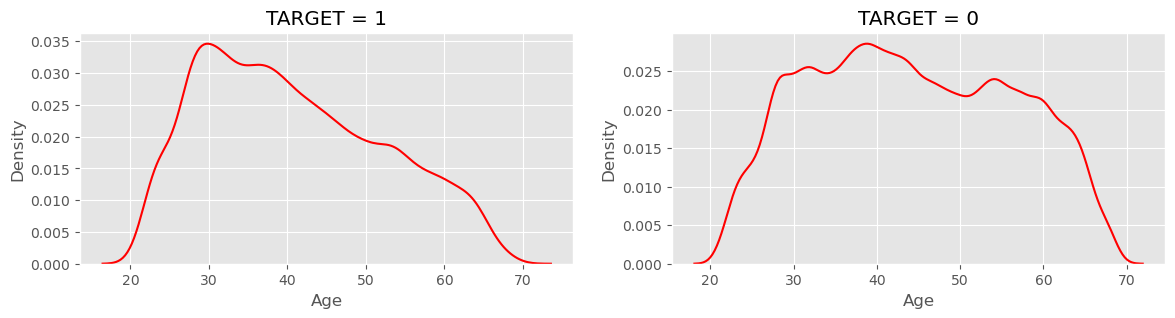

In [662]:
plt.style.use('ggplot')

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.kdeplot(df1[df1.TARGET == 1]['Age'], color = 'Red');
plt.title('TARGET = 1')

plt.subplot(1,2,2)
sns.kdeplot(df1[df1.TARGET == 0]['Age'], color = 'Red');
plt.title('TARGET = 0');


In [663]:
# the clients who are not able to repay the loans have highest distribution of age  in the range 25-35
# the clients who are able to repay the loans have highest distribution of age  in the range 35-40


In [664]:
##########################################################

In [665]:
catCols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS']

numCols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','Age']


In [666]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307233 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

In [667]:
num_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'EXT_SOURCE_2',\
               'EXT_SOURCE_3', 'Age']
cat_columns = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',\
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE']        
len(num_columns), len(cat_columns)

(8, 11)

In [668]:
df1[df1.TARGET == 1][num_columns].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,Age
AMT_INCOME_TOTAL,1.000000,0.356741,0.436348,0.357775,-0.125535,0.145069,-0.086962,-0.002804
AMT_CREDIT,0.356741,1.000000,0.751957,0.973464,0.001875,0.120627,0.051908,0.135349
AMT_ANNUITY,0.436348,0.751957,1.000000,0.752308,-0.081363,0.116048,0.032394,0.014135
AMT_GOODS_PRICE,0.357775,0.973464,0.752308,1.000000,0.008149,0.130552,0.054211,0.139150
DAYS_EMPLOYED,-0.125535,0.001875,-0.081363,0.008149,1.000000,0.000963,0.082336,0.581862
EXT_SOURCE_2,0.145069,0.120627,0.116048,0.130552,0.000963,1.000000,0.048949,0.108397
EXT_SOURCE_3,-0.086962,0.051908,0.032394,0.054211,0.082336,0.048949,1.000000,0.134242
Age,-0.002804,0.135349,0.014135,0.139150,0.581862,0.108397,0.134242,1.000000


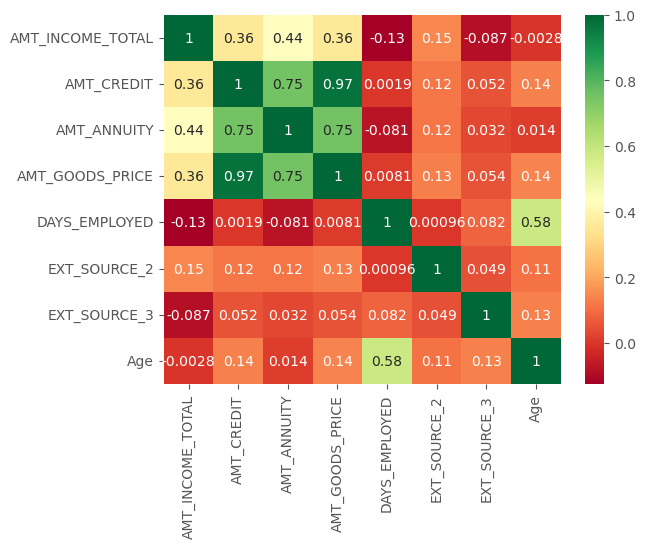

In [669]:
sns.heatmap(df1[df1.TARGET == 1][num_columns].corr(), annot = True, cmap = 'RdYlGn');

In [670]:
# the highest correlation is between the AMT_CREDIT &AMT_GOODS_PRICE

# the weakest correlation is between AMT_INCOME_TOTAL & DAYS_EMPLOYED



In [671]:
df1[df1.TARGET == 0][num_columns].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,Age
AMT_INCOME_TOTAL,1.000000,0.416160,0.487617,0.417680,-0.185568,0.172368,-0.078652,-0.086546
AMT_CREDIT,0.416160,1.000000,0.771102,0.971389,-0.070331,0.129088,0.033508,0.047069
AMT_ANNUITY,0.487617,0.771102,1.000000,0.769757,-0.105264,0.126547,0.025004,-0.012679
AMT_GOODS_PRICE,0.417680,0.971389,0.769757,1.000000,-0.069913,0.135088,0.034671,0.047632
DAYS_EMPLOYED,-0.185568,-0.070331,-0.105264,-0.069913,1.000000,-0.028562,0.100203,0.625852
EXT_SOURCE_2,0.172368,0.129088,0.126547,0.135088,-0.028562,1.000000,0.076012,0.078007
EXT_SOURCE_3,-0.078652,0.033508,0.025004,0.034671,0.100203,0.076012,1.000000,0.175173
Age,-0.086546,0.047069,-0.012679,0.047632,0.625852,0.078007,0.175173,1.000000


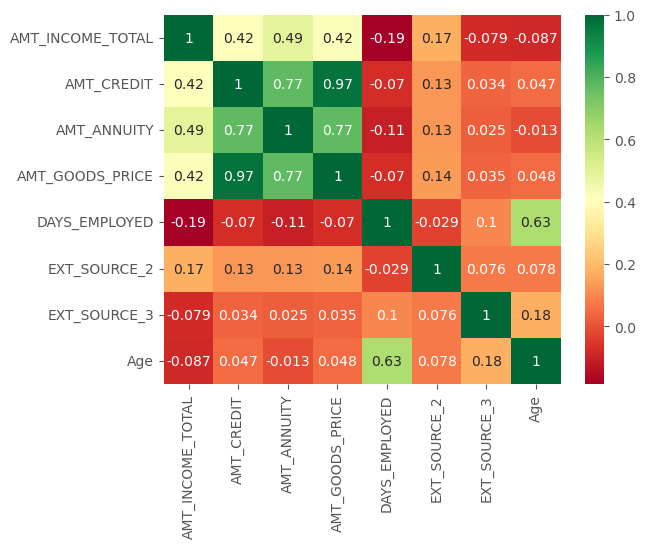

In [672]:
sns.heatmap(df1[df1.TARGET == 0][num_columns].corr(), annot = True, cmap = 'RdYlGn');

In [673]:
# the highest correlation is between the AMT_CREDIT &AMT_GOODS_PRICE

# the weakest correlation is between AMT_INCOME_TOTAL & DAYS_EMPLOYED

Text(0.5, 1.0, 'TARGET 0')

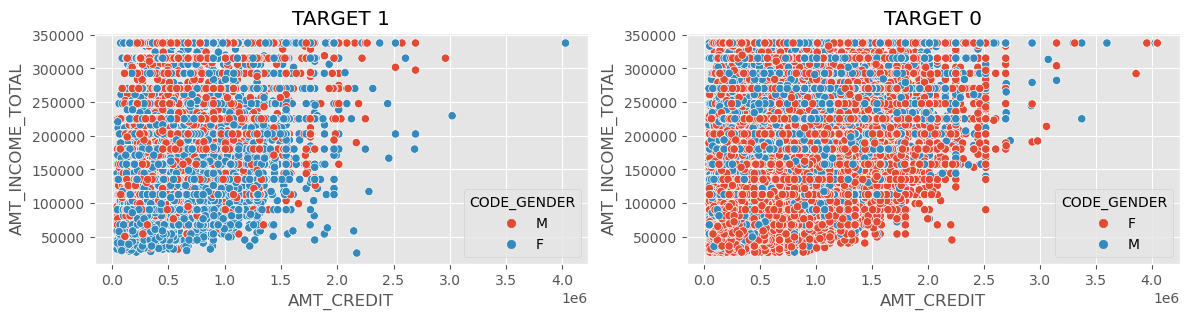

In [674]:
plt.figure(figsize = [14, 3])

plt.subplot(1,2,1)
sns.scatterplot(data = df1[df1.TARGET == 1], x = df1[df1.TARGET == 1]['AMT_CREDIT'], y = df1[df1.TARGET == 1]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 1]['CODE_GENDER']);
plt.title('TARGET 1')

plt.subplot(1,2,2)
sns.scatterplot(data = df1[df1.TARGET == 0], x = df1[df1.TARGET == 0]['AMT_CREDIT'], y = df1[df1.TARGET == 0]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 0]['CODE_GENDER']);
plt.title('TARGET 0')



In [675]:
# in the 1st scatterplot,
# the clients who are not able to repay is shown in the 1st scatter plot
# here it is not evenly distributed since the male data points are clusteres more towards the beginning which corresponds to the income between 15,000-30,000

# in the 2nd scatterplot, 
# the clients who are not able to repay is shown in the 1st scatter plot
# here it is better and is evenly distributed a bit as compared to the 1st scatterplot.
# looks like as the income grows the credit amount also grows

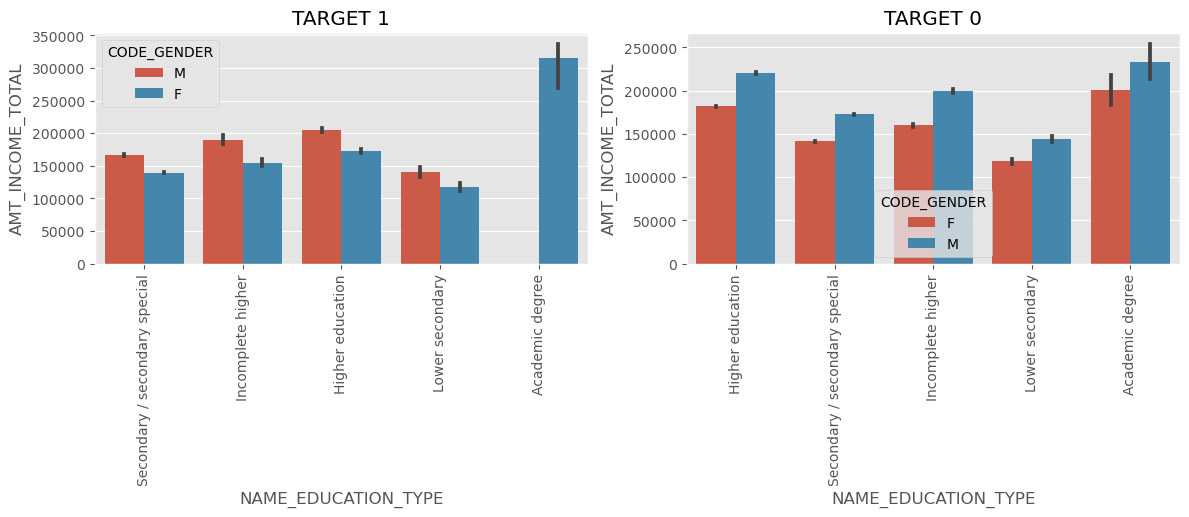

In [676]:
plt.figure(figsize=[14,3])

plt.subplot(1,2,1)
sns.barplot(data = df1[df1.TARGET == 1], x = df1[df1.TARGET == 1]['NAME_EDUCATION_TYPE'], y = df1[df1.TARGET == 1]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 1]['CODE_GENDER'])
plt.xticks(rotation = 90)
plt.title('TARGET 1')

plt.subplot(1,2,2)
sns.barplot(data = df1[df1.TARGET == 0], x = df1[df1.TARGET == 0]['NAME_EDUCATION_TYPE'], y = df1[df1.TARGET == 0]['AMT_INCOME_TOTAL'],\
                hue= df1[df1.TARGET == 0]['CODE_GENDER'])
plt.xticks(rotation = 90)
plt.title('TARGET 0');


In [677]:
In the first figure,
for male clients who are not able to repay the loans, those who have secondary education level their income is more than 150000
for female clients who are not able to repay the loans, those who have secondary education level their income is less than 150000

for male clients who are not able to repay the loans, those who have incomplete higher education level their income is near  200,000
for female clients who are not able to repay the loans, those who have incomplete higher education level their income is about 150000

for male clients who are not able to repay the loans, those who have  higher education level their income is about  200,000
for female clients who are not able to repay the loans, those who have  higher education level their income is less than 200,000

for male clients who are not able to repay the loans, those who have lower secondary education level their income is less than 150,000
for female clients who are not able to repay the loans, those who have lower secondary education level their income is more than 100,000

for female clients who are not able to repay the loans, those who have academic degree education level their income is highest more than  300,000

In the second figure, 
for male clients who are  able to repay the loans, those who have higher education level their income is more than 150,000
for female clients who are  able to repay the loans, those who have higher education level their income is more than 200,000

for male clients who are  able to repay the loans, those who have secondary education level their income is near  150,000
for female clients who are  able to repay the loans, those who have secondary education level their income is more than 150000

for male clients who are  able to repay the loans, those who have  incomplete higher level their income is about 150,000
for female clients who are  able to repay the loans, those who have  incomplete higher education level their income is about 200,000

for male clients who are  able to repay the loans, those who have lower secondary education level their income is more than 100,000
for female clients who are  able to repay the loans, those who have lower secondary education level their income is near 150,000

for male clients who are  able to repay the loans, those who have academic degree education level their income is near 200,000
for female clients who are  able to repay the loans, those who have academic degree education level their income is near 250,000


SyntaxError: invalid syntax (Temp/ipykernel_15332/3553275583.py, line 1)

In [ ]:
pd.pivot_table(df1 , index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER' , values = 'TARGET')

In [ ]:
sns.heatmap(pd.pivot_table(df1 , index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER' , values = 'TARGET'), cmap = 'RdYlGn', annot = True, center = 0.117);


In [ ]:
pd.pivot_table(df1 , index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER' , values = 'TARGET')

In [ ]:
sns.heatmap(pd.pivot_table(df1 , index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER' , values = 'TARGET'), cmap = 'RdYlGn', annot = True, center = 0.117);


In [ ]:
sns.pairplot(df1[df1['TARGET'] == 0][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']] );

In [ ]:
# In this pairplot the AMT_CREDIT VS AMT ANNUITY shows as one grows another grows along with it.
# as AMT_GOODS_PRICE increases the AMT_ANNUITY & AMT_CREDIT also increases and at a certain point it doesnot grow

In [ ]:
sns.pairplot(df1[df1['TARGET'] == 1][['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']] );

In [ ]:
# In this pairplot the AMT_CREDIT VS AMT ANNUITY shows as one grows another grows along with it.
# as AMT_GOODS_PRICE increases the AMT_ANNUITY & AMT_CREDIT also increases and at a certain point it doesnot grow

In [ ]:
df1

In [ ]:
# Previous dataset

In [ ]:
df2 = pd.read_csv('previous_application.csv')

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
df2.isna().sum()

In [ ]:
len(df2.columns[df2.isna().sum() > 0])

In [ ]:
df2.drop(df2.loc[:, ((((df2.isna().sum()/len(df2))*100))>=40)], axis = 1, inplace = True)


In [ ]:
df2.isna().sum()

In [ ]:
df2 = df2.loc[:, ~(df2.columns.isin(['FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'WEEKDAY_APPR_PROCESS_START']))]

In [ ]:
df2.info()

In [ ]:
(df2.isna().sum()/len(df2))*100

In [ ]:
df2 = df2.loc[:, ~(df2.columns.isin(['NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE']))]

In [ ]:
df2.isna().sum()

In [ ]:
(df2.isna().sum()/len(df2))*100

In [ ]:
df2.replace({'XNP':np.NaN, 'XNA':np.NaN}, inplace = True)

In [ ]:
(df2.isna().sum()/len(df2))*100

In [ ]:
len(df2[df2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].isna().all(axis=1)])
# len(df2[df2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].isna().all(axis=1)].index)

In [ ]:
df2.shape

In [ ]:
df2 = df2.loc[~(df2.index.isin(df2[df2[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].isna().all(axis=1)].index)), :]

In [ ]:
(df2.isna().sum()/len(df2))*100

In [ ]:
df2.AMT_ANNUITY.describe().round()

In [ ]:
sns.boxplot(data = df2, y = df2.AMT_ANNUITY);

In [ ]:
df1.AMT_ANNUITY.replace(np.NaN, df2.AMT_ANNUITY.mean(), inplace = True)

In [ ]:
int_quart_range = df2.AMT_ANNUITY.quantile([0.25, 0.75]).values[1] - df2.AMT_ANNUITY.quantile([0.25, 0.75]).values[0]

In [ ]:
ub = 1.5*int_quart_range + df2.AMT_ANNUITY.quantile([0.25, 0.75]).values[1]
clip

In [ ]:
df2.AMT_ANNUITY =  np.where(df2.AMT_ANNUITY > ub, ub, df2.AMT_ANNUITY)
df2.AMT_ANNUITY.head(25)

In [ ]:
sns.boxplot(data = df2, y = df2.AMT_ANNUITY);

In [ ]:
df2.AMT_ANNUITY.describe().round()

In [ ]:
df2 = df2.loc[~(df2.index.isin(df2[df2[['AMT_GOODS_PRICE', 'AMT_CREDIT']].isna().any(axis=1)].index)), :]

In [ ]:
df2.shape

In [ ]:
df2.CNT_PAYMENT.replace(np.NaN, df2.CNT_PAYMENT.mean(), inplace = True)

In [ ]:
(df2.isna().sum()/len(df2))*100

In [ ]:
(df2.isna().sum()/len(df2))*100

In [ ]:
for i in ['AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION']:
    int_quart_range = df2[i].quantile([0.25, 0.75]).values[1] - df2[i].quantile([0.25, 0.75]).values[0]
    ub = 1.5*int_quart_range + df2[i].quantile([0.25, 0.75]).values[1]
    df2[i] =  np.where(df2[i] > ub, ub, df2[i])

In [ ]:
j=1
plt.figure(figsize=(20,10))

for i in ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', 'CODE_REJECT_REASON','CHANNEL_TYPE']:
    plt.subplot(3,2,j)
    sns.histplot(data=df2,x=i, multiple='dodge', discrete=True);
    plt.subplots_adjust(wspace=0.4, hspace=0.8)
    
    if j == len(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', 'CODE_REJECT_REASON','CHANNEL_TYPE']):
        plt.subplot(3,2,j)     
        sns.histplot(data=df2, x=i, multiple='dodge', discrete=True);
        plt.subplots_adjust(wspace=0.4, hspace=0.8)
        plt.xticks(rotation = 90)

    j=j+1


In [ ]:
df2.dtypes

In [ ]:
df2.DAYS_DECISION = df2.DAYS_DECISION.apply(lambda x: (-1)*int(x))
df2.dtypes

In [ ]:
df2.DAYS_DECISION


In [ ]:
df2['mnth_Decision'] = np.floor(df2.DAYS_DECISION/30).astype(int)
df2

In [ ]:
sns.distplot(df2['mnth_Decision'], bins=30 );

In [ ]:
# here according to the plot, many decisions is made in 14 - 18 months

# JOIN BOTH THE GIVEN DATASETS

In [ ]:
print(list(df2.columns))
print('\n',list(df1.columns))

In [ ]:
df1[['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age','AMT_INCOME_TOTAL','EXT_SOURCE_2',\
 'EXT_SOURCE_3']]



In [ ]:
df2[["SK_ID_CURR",'AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','NAME_CONTRACT_TYPE',\
 'NAME_CONTRACT_STATUS', 'mnth_Decision']]

In [ ]:
df3 = pd.merge(df1[['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','Age','AMT_INCOME_TOTAL','EXT_SOURCE_2',\
 'EXT_SOURCE_3']], df2[['SK_ID_CURR','AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','NAME_CONTRACT_TYPE',\
 'NAME_CONTRACT_STATUS', 'mnth_Decision']], how = 'left' , on = 'SK_ID_CURR')

df3

In [ ]:
df3['prcnt_CR'] = np.floor(df3['AMT_CREDIT']/df3['AMT_APPLICATION'])
df3

# UNIVARIATE ANALYSIS

In [ ]:
df3.NAME_CONTRACT_TYPE.unique()

In [ ]:
# df3['NAME_CONTRACT_TYPE'].dtype

plt.style.use('default')

sns.histplot(data=df3['NAME_CONTRACT_TYPE'], multiple='dodge', discrete=True, color = 'yellow');

In [ ]:
# the clients who took consumer loans were the the highest in number which was more than 600,000
# the clients who took the cash loans were lesser in number which was near to 400,00 
# the number of clients who took the revolving loans were the least which was 100,000
# most clients applied for the cash loans

In [ ]:
sns.histplot(data=df3['NAME_CONTRACT_STATUS'], multiple='dodge', discrete=True, color = 'green');

In [ ]:
# loan application which got approved was most in number which was more than 800,000
# loan application which got rejected/refused was less which was 200,000
# loan application which got cancelled was less which was less than 10,000
# loan application which got unused offer was less which was near to 2,000

In [ ]:
sns.histplot(data=df3['NAME_EDUCATION_TYPE'], multiple='dodge', discrete=True, color = 'orange');
plt.xticks(rotation = 90);

In [ ]:
# clients whose education was secondary level was about 800,000
# clients whose education was higher education level was about 250,000
# clients whose education was incomplete higher level was about 2,000
# clients whose education was lower secodary level was about 1,000
# clients whose education was academic degree level was close to none


In [ ]:
sns.kdeplot(df3['AMT_CREDIT'], color = 'cyan');

# loan amounts till 150,000 has been provided to clients most number of times
# loan amounts from 580,000 to  630,000 has been provided to clients most number of times as well.



In [ ]:
sns.kdeplot(df3['mnth_Decision'], color = 'Orange');



In [ ]:
# In months between 15th-18th highest number of decisions were taken as to providing the loans to clients or not. 
# In the months till 65th the decisions taken decreases and at around the 80th-90th months a little more decisions are made.

# BIVARIATE ANALYSIS

In [ ]:
# Analysing 'AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision'

In [ ]:
df3[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision']].corr()

In [ ]:
sns.heatmap(df3[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision']].corr(), cmap = 'RdYlGn', annot = True);

In [ ]:

# the highest strongest positive correlation is between the following variables:
# 1. AMT_ANNUITY & AMT_CREDIT, 
# 2. AMT_APPLICATION & AMT_CREDIT
# 3. AMT_ANNUITY & AMT_CREDIT
# 4. AMT_ANNUITY & AMT_APPLICATION

# the lowest negative weakest correlation is between the following variables:
# 1. AMT_CREDIT & mnth_Decision
# 2. AMT_APPLICATION & mnth_Decision
# 3. prcnt_CR & mnth_Decision
# 4. mnth_Decision & AMT_APPLICATION
# 5. mnth_Decision & AMT_CREDIT

In [ ]:
# Analysing 'NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS'

In [ ]:
df4 = df3[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT', 'prcnt_CR', 'mnth_Decision']]
df4

In [ ]:
j=1
plt.figure(figsize=(21,11))

for i in ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']:
    plt.subplot(2,2,j)
    sns.histplot(data=df3, x=i, hue = 'CODE_GENDER', multiple='dodge', discrete=True);
    plt.subplots_adjust(wspace=0.4, hspace=1)
    plt.xticks(rotation = 90)
    j=j+1

In [ ]:
# the consumer loans were taken more than other kinds of loans
# the applications for consumer loans by female clients were much high than cash loans/revolving loans by female clients
# the applications for consumer loans by male clients were higher than cash loans/revolving loans by male clients

# clients who were educated till secondary level were the most applying for loans.
# the applications of secondary educated female clients were very high as compared to higher education female clients
# the applications of secondary educated male clients were high as compared to higher education male clients

# most applications were of female married clients
# married female applications were very high as compared to single female applications
# married male applications were higher as compared to male single male applications


In [ ]:
j=1
plt.figure(figsize=(21,11))

for i in ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']:
    plt.subplot(2,2,j)
    sns.histplot(data=df3, x=i, hue = 'NAME_CONTRACT_STATUS', multiple='dodge', discrete=True);
    plt.subplots_adjust(wspace=0.4, hspace=1)
    plt.xticks(rotation = 90)
    j=j+1

In [ ]:
# the number of approved consumer loans applications were very high as  compared to to the refused consumer loans applications and unused offer consumer loans.
# the number of approved cash loans applications were significantly high as compared to refused cash loans applications
# the number of approved revolving loans applications were high by a small margin as compared to refused revolving loans applications.

# the number of approved applications having education level as secondary were very high.
# the number of approved applications having education level as higher education were high.
# the number of approved applications having education level as incomplete higher were small.

# the number of applications of the married clients whose applications got approved were very high as compared to single who had their applications approved 
# the number of applications of the married clients whose applications got refused were higher as compared to single clients who had their applications approved 


In [ ]:
sns.histplot(x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER", multiple = 'dodge', data = df3 );

In [ ]:
# The applications of female applicants got approved a lot more than the male applications
# More applications of female applicants got refused than applications of male applicants.
# More applications of female applicants were unused than applications of male applicants just by a little bit.
# very few female and male client's application got cancelled.